<html>
<head>
<style>
    body {
        font-family: 'Arial', sans-serif;
        margin-left: 40px;
        background: #ECE9E6;  /* Color de fondo general */
        background: -webkit-linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado para Chrome */
        background: linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado estándar */
    }
    .header {
        color: #2E86C1; /* Azul oscuro */
        padding-bottom: 10px;
        font-size: 32px;
        font-weight: bold;
        border-bottom: 3px solid #2E86C1; /* Borde con el mismo color para consistencia */
    }
    .subheader {
        color: #3498DB; /* Azul un poco más claro */
        padding-top: 5px;
        font-size: 24px;
    }
    .description {
        color: #5DADE2; /* Azul aún más claro para el cuerpo de texto */
        padding: 20px 0;
        font-size: 16px;
        text-align: left;
    }
    .footer {
        color: #AED6F1; /* Azul muy claro para la fecha */
        font-size: 14px;
        padding-top: 30px;
    }
</style>
</head>
<body>

<div class="header">
    Series de Tiempo (Predicción y Caos)
</div>

<div class="subheader">
    Alumno: Rodrigo Gerardo Trejo Arriaga
</div>

<div class="description">
    <strong>Título de la Práctica:</strong> Generación de datos caóticos
    <br><br>
    Este trabajo se centra en el análisis de los datos obtenidos en la caminata de un caminante aleatorio alimentado por diferentes modelos caóticos
</div>

<div class="footer">
    Fecha de Entrega: <strong>30 de Abril, 2024</strong>
</div>

</body>
</html>


In [209]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gmean, skew, kurtosis, mode
from scipy import stats

In [210]:
def cargar_csv(ruta:str, separador:str):

    try:
        with open(ruta, 'r', encoding='utf-8') as archivo:
            lineas = archivo.readlines()

            datos = [linea.strip().split(separador) for linea in lineas]
            
            datos = datos[0][:40000]
            
            if separador ==  ",":
                return [int(dato) for dato in datos]
            else:
                return [tuple(map(int, item.split(','))) for item in datos]
                
    except FileNotFoundError:
        print("El archivo no fue encontrado.")
        return []

def convertir_camelCase(text):
    cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace())
    words = cleaned_text.split()
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

In [211]:
def graficar(x, t, plot_type='scatter', width=7, height=5, save_as_pdf=False, titulo="Diagrama de bifurcación cúbica de Feigenbaum"):
    """
    Crea un gráfico utilizando Matplotlib con estilo personalizado y márgenes ajustados.
    """
    plt.style.use('seaborn-darkgrid')
    plt.rcParams['axes.facecolor'] = '#e9f0fb'
    plt.rcParams['grid.color'] = 'white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = 1.5
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = 'black'

    fig, ax = plt.subplots(figsize=(width*1.5, height*1.5))
    fig.subplots_adjust(left=0.15, right=1, top=0.85, bottom=0.15)

    # Crear el gráfico
    if plot_type == 'scatter':
        ax.scatter(t, x, color='blue', marker='o', s=0.1)
    elif plot_type == 'line':
        ax.plot(t, x, color='blue', linewidth=1)
    elif plot_type == 'scatter_line':
        ax.scatter(t, x, color='blue', marker='o', s=0.1)
        ax.plot(t, x, color='blue', linewidth=0.5)

    ax.set_title(titulo, fontsize=16, loc='left', pad=20, color='black')
    ax.set_xlabel('Tasa de crecimiento t', fontsize=13, labelpad=15, color='black')
    ax.set_ylabel('Valor de x', fontsize=13, labelpad=15, color='black')
    ax.tick_params(axis='both', which='major', labelsize=10)

    if save_as_pdf:
        plt.savefig(f"{titulo.replace(' ', '_')}.pdf", format='pdf', dpi=300)

    plt.show()


In [212]:
def graficar_posicionesOcupadas(cube_size, positions, save_as_pdf=False, title="Porcentaje de Posiciones visitadas"):
    """
    Función para graficar el porcentaje de área ocupada por un caminante aleatorio en una cámara cúbica con estilo personalizado.
    
    Parámetros:
    - cube_size (int): tamaño de un lado de la cámara cúbica.
    - positions (list of tuples): lista de posiciones (x, y, z) por las que ha pasado el caminante.
    - save_as_pdf (bool): si es True, guarda el gráfico como PDF.
    - title (str): título del gráfico.
    """
    plt.style.use('seaborn-darkgrid')
    plt.rcParams['axes.facecolor'] = '#e9f0fb'
    plt.rcParams['grid.color'] = 'white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = 1.5
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = 'black'

    total_cells = cube_size ** 3

    unique_positions = set()

    occupied_percentage = []

    for position in positions:
        unique_positions.add(position)
        occupied_percentage.append(len(unique_positions) / total_cells * 100)

    fig, ax = plt.subplots(figsize=(7*1.5, 5*1.5))
    fig.subplots_adjust(left=0.15, right=1, top=0.85, bottom=0.15)

    ax.plot(list(range(1, len(occupied_percentage) + 1)), occupied_percentage, 'o-', color='blue', markersize=1, linewidth=1.5)
    ax.set_title(title, fontsize=16, loc='left', pad=20, color='black')
    ax.set_xlabel('Paso de Tiempo', fontsize=13, labelpad=15, color='black')
    ax.set_ylabel('Porcentaje de Área Ocupada (%)', fontsize=13, labelpad=15, color='black')
    ax.tick_params(axis='both', which='major', labelsize=10)

    if save_as_pdf:
        plt.savefig(f"{title.replace(' ', '_')}.pdf", format='pdf', dpi=300)

    plt.show()


In [213]:
def plotear_hist(array: np.ndarray, titulo: str, label_x: str, label_y: str, criterio: str = 'sturges', guardar=False) -> None:
    """
    Genera y guarda un histograma con estilos personalizados, colores aleatorios para cada barra,
    y el número de bins determinado por el criterio especificado.

    Args:
        array (np.ndarray): Array de Numpy con los datos que se quieren plasmar en el histograma.
        titulo (str): Título del histograma.
        label_x (str): Etiqueta del eje x del histograma.
        label_y (str): Etiqueta del eje y del histograma.
        ruta_img (str): Ruta donde se guardará la imagen del histograma.
        criterio (str): Método para calcular el número de bins ('sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', 'rice').

    Returns:
        None: La función no retorna nada.
    """
    plt.style.use('dark_background')
    
    match criterio:
        case 'sturges':
            bins = int(1 + np.log2(len(array)))
        case 'freedman-diaconis':
            iqr = np.subtract(*np.percentile(array, [75, 25]))
            bin_width = 2 * iqr * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
        case 'scott':
            bin_width = 3.5 * np.std(array) * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
        case 'raiz_cuadrada':
            bins = int(np.sqrt(len(array)))
        case 'rice':
            bins = int(2 * len(array) ** (1/3))
        case 'secreto':
            bins = len(set(array))
        case _:
            raise ValueError("Criterio no reconocido. Usa 'sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', o 'rice'.")

    n, bins, patches = plt.hist(array, bins=bins, alpha=0.75, rwidth=0.85)

    for patch in patches:
        plt.setp(patch, 'facecolor', np.random.rand(3,))
        
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.title(titulo, fontsize=20, fontweight='bold', color=np.random.rand(3,))
    plt.xlabel(label_x, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylabel(label_y, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylim(0, max(n)*1.1)

    if guardar:
        ruta_img = f"{convertir_camelCase(titulo)}.pdf"
        plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    
    plt.show()


In [214]:
class DistribucionProbabilidad:
    def __init__(self, datos):
        self.datos = np.array(datos)
        self.n = len(datos)

    def media(self):
        return np.mean(self.datos, axis=0)
    
    def mediana(self):
        return np.median(self.datos, axis=0)
    
    def moda(self):
        mode_res = mode(self.datos, axis=0)
        """if len(mode_res.mode) > 0:
            return mode_res.mode[0]
        else:
            return np.nan"""
        return mode_res
                
    def media_geometrica(self):
        return gmean(self.datos, axis=0)
    
    def asimetria(self):
        return skew(self.datos, axis=0)
    
    def rango(self):
        return np.ptp(self.datos, axis=0)
    
    def desviacion_estandar(self):
        return np.std(self.datos, axis=0, ddof=1)
    
    def varianza(self):
        return np.var(self.datos, axis=0, ddof=1)
    
    def coeficiente_variacion(self):
        return self.desviacion_estandar() / self.media()
    
    def percentil(self, p):
        if 0 <= p <= 100:
            return np.percentile(self.datos, p, axis=0)
        else:
            raise ValueError("El percentil debe estar entre 0 y 100.")
    
    def curtosis(self):
        return kurtosis(self.datos, axis=0)
    
    def entropia(self):
        p, counts = np.unique(self.datos, return_counts=True)
        p = counts / len(self.datos)
        return -np.sum(p * np.log(p))
    
    def calcular_metricas(self, percentiles, cuartiles):
        resultados = {
            'Media': self.media(),
            'Mediana': self.mediana(),
            'Moda': self.moda(),
            'Media Geométrica': self.media_geometrica(),
            'Rango': self.rango(),
            'Desviación Estándar': self.desviacion_estandar(),
            'Varianza': self.varianza(),
            'Asimetría': self.asimetria(),
            'Coeficiente de Variación': self.coeficiente_variacion(),
            'Curtosis': self.curtosis(),
            'Entropía': self.entropia()
        }
        for p in percentiles:
            resultados[f'Percentil {p}'] = self.percentil(p)
        for q in cuartiles:
            resultados[f'Cuartil {q}'] = self.percentil(q * 25)
        
        # Convertir el diccionario a DataFrame de Pandas
        resultados_df = pd.DataFrame([resultados], index=['Valor'])
        
        # Redondear todos los valores a tres decimales
        resultados_df = resultados_df.round(3)

        # Transponer el DataFrame para hacerlo vertical
        resultados_df = resultados_df.transpose().reset_index()
        resultados_df.columns = ['Métrica', 'Valor']

        return resultados_df

class DistribucionProbabilidadVector(DistribucionProbabilidad):
    def __init__(self, datos):
        super().__init__(datos)
        
    def entropia(self):
        # Inicializa un array para guardar la entropía de cada componente
        entropias = np.zeros(3)
        # Calcula la entropía para cada dimensión (columna)
        for i in range(3):  # Asumiendo que tienes 3 dimensiones: X, Y, Z
            p, counts = np.unique(self.datos[:, i], return_counts=True)
            p = counts / len(self.datos)
            entropias[i] = -np.sum(p * np.log(p))
        return tuple(entropias)
        
    def calcular_metricas(self):
        # Calcular y redondear cada métrica antes de convertirla en tupla
        media = tuple(np.round(self.media(), 3))
        mediana = tuple(np.round(self.mediana(), 3))
        moda = tuple(np.round(self.moda(), 3))
        media_geometrica = tuple(np.round(self.media_geometrica(), 3))
        rango = tuple(np.round(self.rango(), 3))
        desviacion_estandar = tuple(np.round(self.desviacion_estandar(), 3))
        varianza = tuple(np.round(self.varianza(), 3))
        asimetria = tuple(np.round(self.asimetria(), 3))
        coeficiente_variacion = tuple(np.round(self.coeficiente_variacion(), 3))
        curtosis = tuple(np.round(self.curtosis(), 3))
        entropia = tuple(np.round(self.entropia(), 3))

        resultados = {
            'Media': media,
            'Mediana': mediana,
            'Moda': moda,
            'Media Geométrica': media_geometrica,
            'Rango': rango,
            'Desviación Estándar': desviacion_estandar,
            'Varianza': varianza,
            'Asimetría': asimetria,
            'Coeficiente de Variación': coeficiente_variacion,
            'Curtosis': curtosis,
            'Entropía': entropia
        }
        
        # Convertir el diccionario a DataFrame de Pandas
        resultados_df = pd.DataFrame([resultados], index=['Valor'])
        
        # Transponer el DataFrame para hacerlo vertical
        resultados_df = resultados_df.transpose().reset_index()
        resultados_df.columns = ['Métrica', 'Valor']

        return resultados_df

## Caminante de Feigenbaum

![Caminante de Feigenbaum](datos//Feigenbaum/Feigenbaum.png)

### Dirección

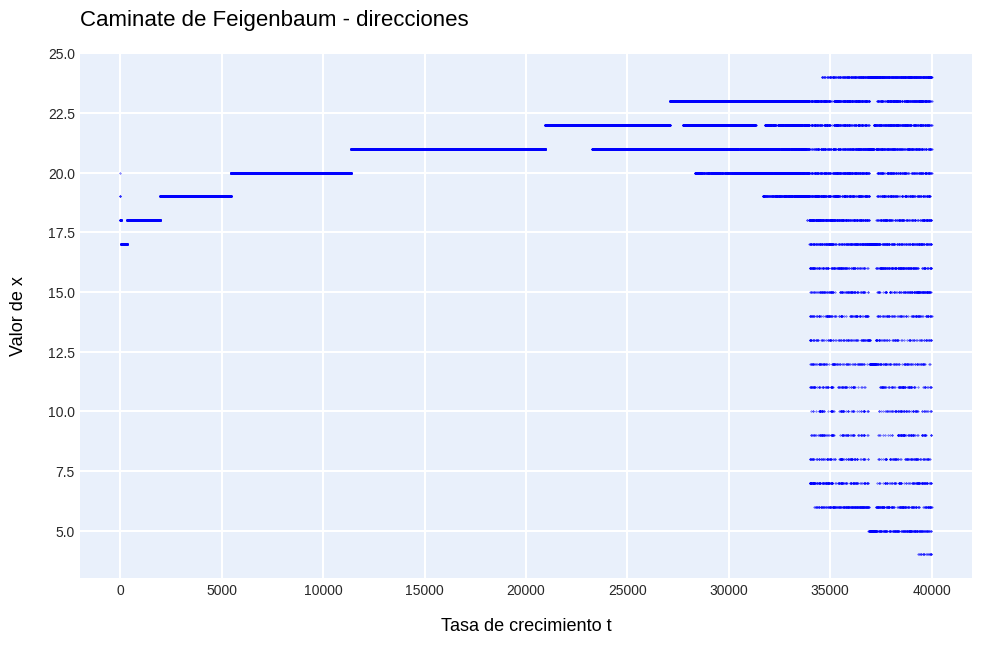

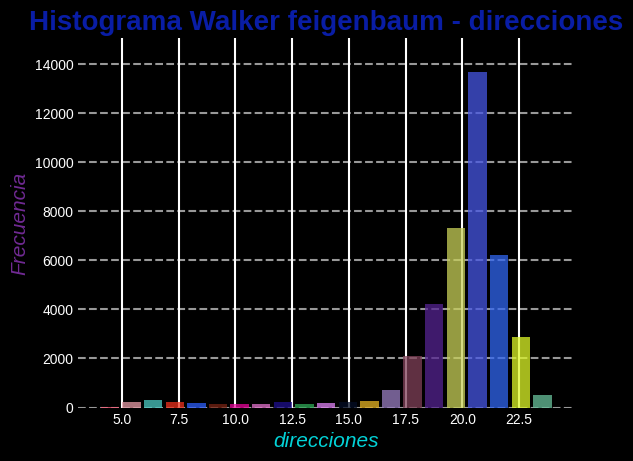

Métrica        Valor
0                      Media       20.068
1                    Mediana         21.0
2                       Moda  (21, 13678)
3           Media Geométrica       19.714
4                      Rango           20
5        Desviación Estándar        2.965
6                   Varianza        8.788
7                  Asimetría       -2.969
8   Coeficiente de Variación        0.148
9                   Curtosis       10.539
10                  Entropía        1.996
11              Percentil 25         20.0
12              Percentil 50         21.0
13              Percentil 75         21.0
14                 Cuartil 1         20.0
15                 Cuartil 2         21.0
16                 Cuartil 3         21.0

In [215]:
modelo = "feigenbaum"
metrica = "direcciones"
folder = "Feigenbaum"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {convertir_camelCase(modelo)} - {metrica}", metrica, "Frecuencia", criterio="secreto")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Distancia

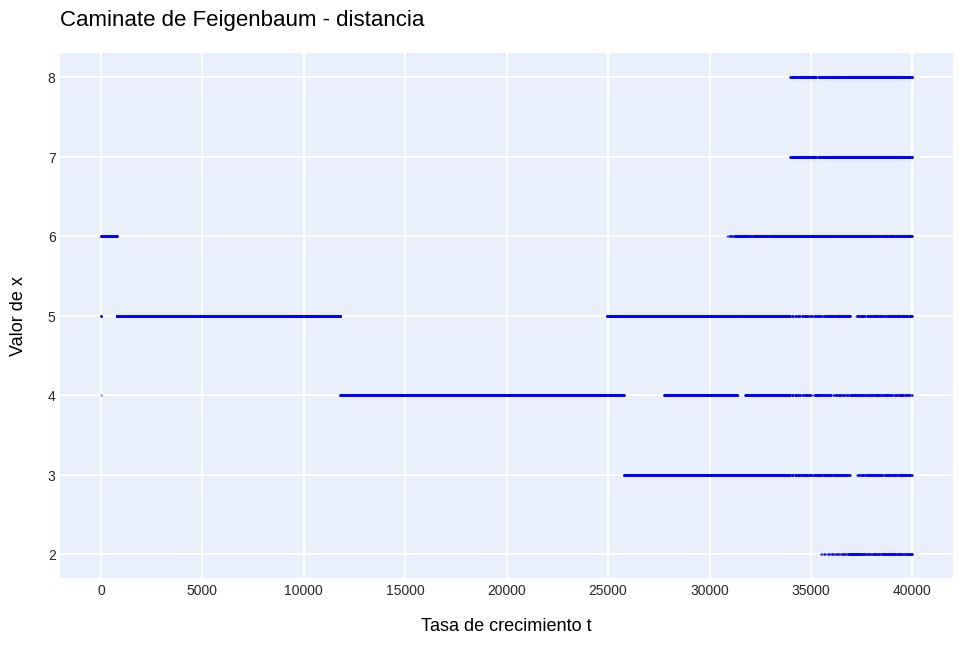

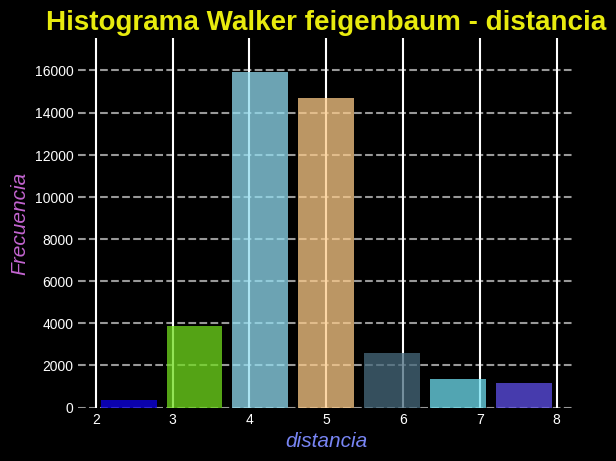

Métrica       Valor
0                      Media       4.604
1                    Mediana         4.0
2                       Moda  (4, 15946)
3           Media Geométrica       4.483
4                      Rango           6
5        Desviación Estándar       1.085
6                   Varianza       1.177
7                  Asimetría       0.929
8   Coeficiente de Variación       0.236
9                   Curtosis       1.646
10                  Entropía         1.4
11              Percentil 25         4.0
12              Percentil 50         4.0
13              Percentil 75         5.0
14                 Cuartil 1         4.0
15                 Cuartil 2         4.0
16                 Cuartil 3         5.0

In [216]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {convertir_camelCase(modelo)} - {metrica}", metrica, "Frecuencia", criterio="secreto")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Choques

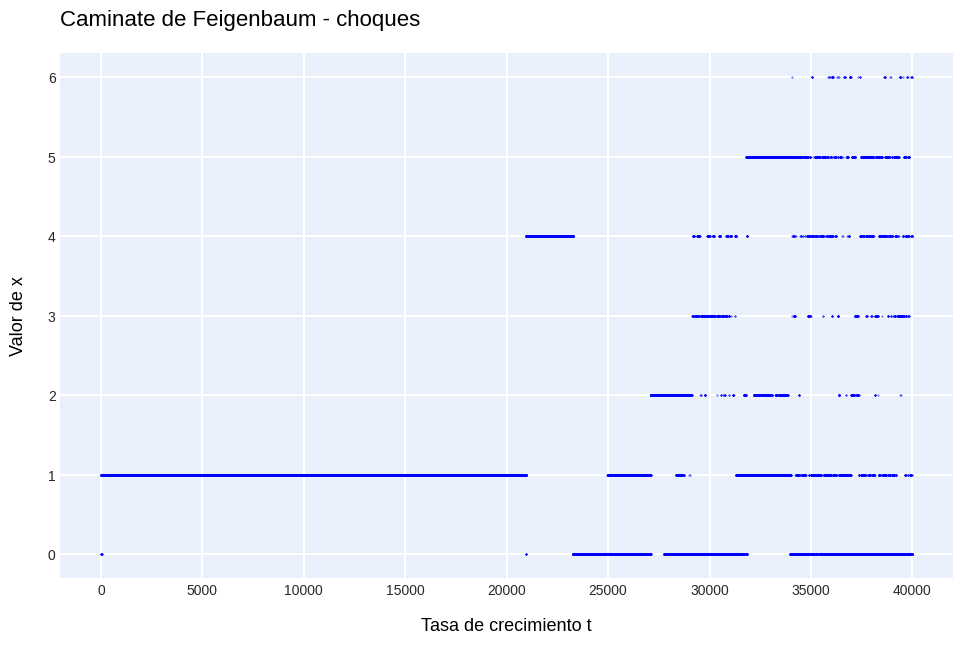

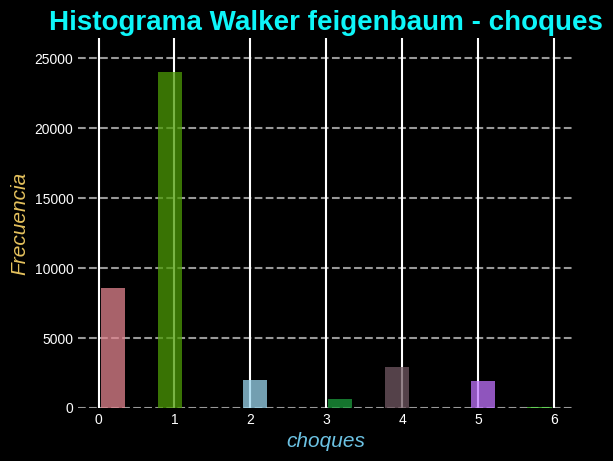

Métrica       Valor
0                      Media       1.282
1                    Mediana         1.0
2                       Moda  (1, 24049)
3           Media Geométrica         0.0
4                      Rango           6
5        Desviación Estándar       1.304
6                   Varianza       1.701
7                  Asimetría       1.678
8   Coeficiente de Variación       1.017
9                   Curtosis       2.073
10                  Entropía       1.192
11              Percentil 25         1.0
12              Percentil 50         1.0
13              Percentil 75         1.0
14                 Cuartil 1         1.0
15                 Cuartil 2         1.0
16                 Cuartil 3         1.0

In [217]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {convertir_camelCase(modelo)} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Posiciones

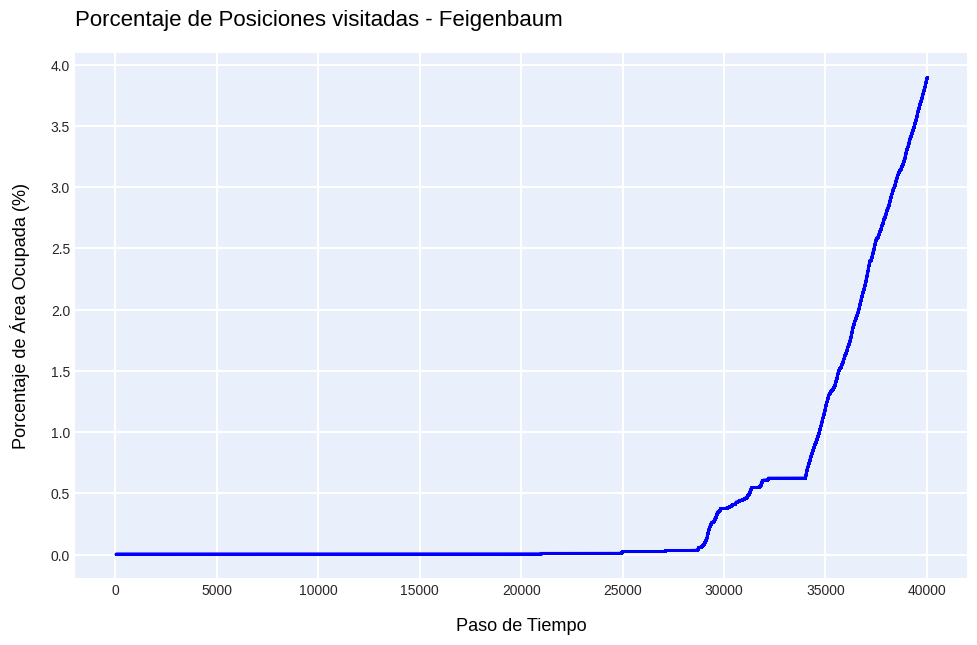

Métrica                                 Valor
0                      Media               (19.862, 7.186, 36.397)
1                    Mediana                     (20.0, 0.0, 49.0)
2                       Moda  ([20, 0, 49], [22135, 24255, 22538])
3           Media Geométrica                       (0.0, 0.0, 0.0)
4                      Rango                          (49, 49, 49)
5        Desviación Estándar                (12.46, 13.25, 18.253)
6                   Varianza           (155.256, 175.568, 333.158)
7                  Asimetría                (0.662, 1.898, -1.072)
8   Coeficiente de Variación                 (0.627, 1.844, 0.501)
9                   Curtosis                  (0.63, 2.51, -0.506)
10                  Entropía                 (2.116, 1.876, 2.014)

In [218]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
graficar_posicionesOcupadas(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")
ex = DistribucionProbabilidadVector(np.array(walker_feig))
res = ex.calcular_metricas()
res

## Caminante de Feigenbaum Exponencial

![Exponencial](datos/FeigenbaumExponencial/FeigenbaumExponencial2.png)


### Direcciones

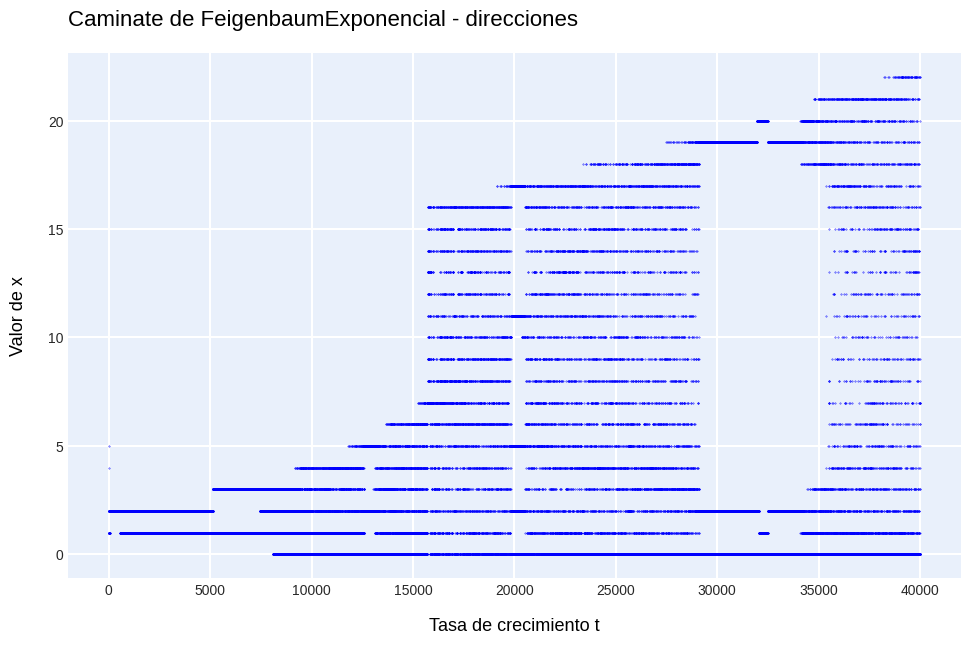

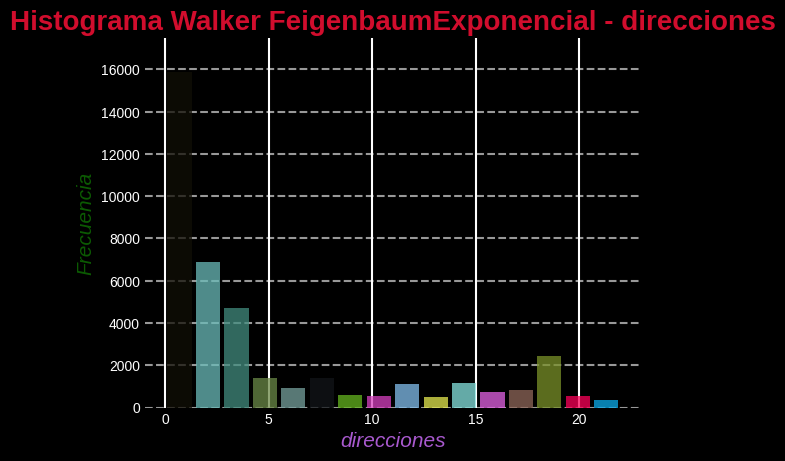

Métrica      Valor
0                      Media      4.904
1                    Mediana        2.0
2                       Moda  (0, 8224)
3           Media Geométrica        0.0
4                      Rango         22
5        Desviación Estándar      6.123
6                   Varianza     37.497
7                  Asimetría      1.354
8   Coeficiente de Variación      1.249
9                   Curtosis      0.436
10                  Entropía      2.492
11              Percentil 25        1.0
12              Percentil 50        2.0
13              Percentil 75        7.0
14                 Cuartil 1        1.0
15                 Cuartil 2        2.0
16                 Cuartil 3        7.0

In [219]:
modelo = "feigenbaumexponencial"
metrica = "direcciones"
folder = "FeigenbaumExponencial"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Distancia

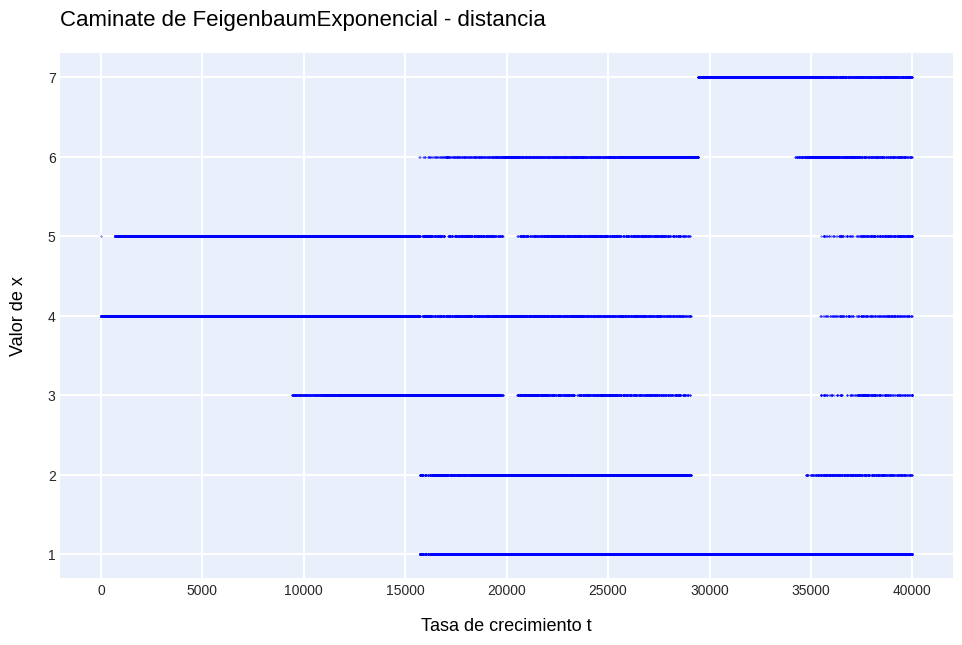

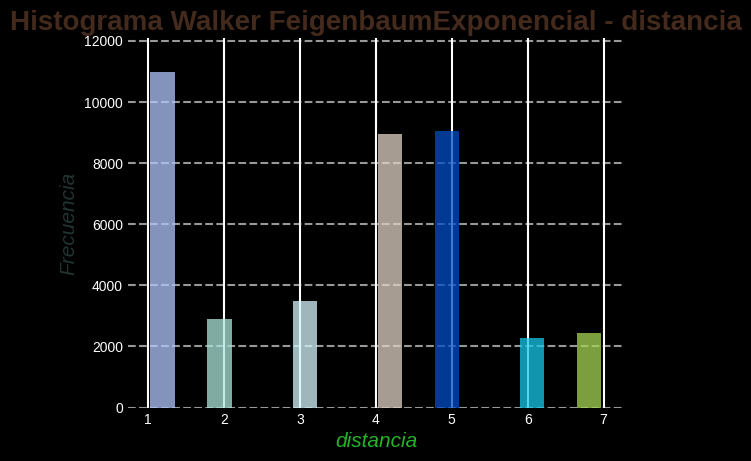

Métrica       Valor
0                      Media       3.467
1                    Mediana         4.0
2                       Moda  (1, 10985)
3           Media Geométrica       2.823
4                      Rango           6
5        Desviación Estándar       1.887
6                   Varianza       3.563
7                  Asimetría       0.015
8   Coeficiente de Variación       0.544
9                   Curtosis      -1.141
10                  Entropía        1.76
11              Percentil 25         1.0
12              Percentil 50         4.0
13              Percentil 75         5.0
14                 Cuartil 1         1.0
15                 Cuartil 2         4.0
16                 Cuartil 3         5.0

In [220]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Choques

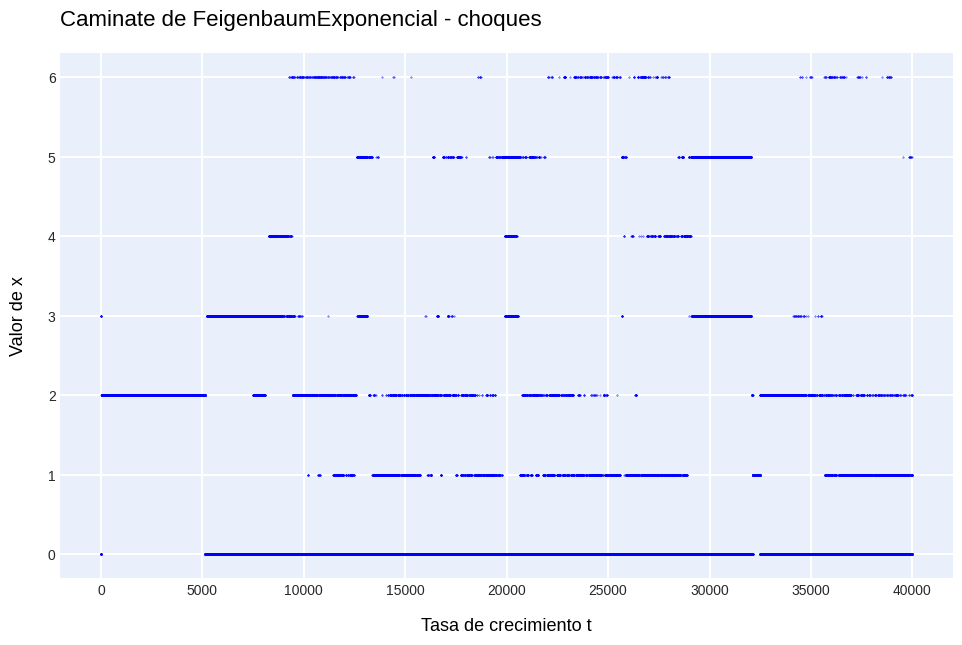

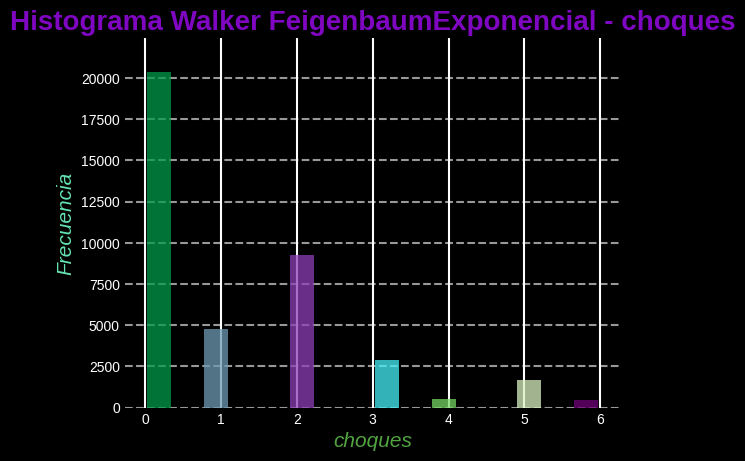

Métrica       Valor
0                      Media       1.136
1                    Mediana         0.0
2                       Moda  (0, 20392)
3           Media Geométrica         0.0
4                      Rango           6
5        Desviación Estándar       1.453
6                   Varianza        2.11
7                  Asimetría       1.308
8   Coeficiente de Variación       1.279
9                   Curtosis       1.247
10                  Entropía       1.371
11              Percentil 25         0.0
12              Percentil 50         0.0
13              Percentil 75         2.0
14                 Cuartil 1         0.0
15                 Cuartil 2         0.0
16                 Cuartil 3         2.0

In [221]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Posiciones

[(5, 25, 25), (5, 25, 29), (5, 30, 29), (9, 30, 29), (9, 34, 29), (13, 34, 29), (13, 38, 29), (17, 38, 29), (17, 42, 29), (21, 42, 29), (21, 46, 29), (25, 46, 29), (25, 49, 29), (29, 49, 29), (29, 49, 29), (33, 49, 29), (33, 49, 29), (37, 49, 29), (37, 49, 29), (41, 49, 29), (41, 49, 29), (45, 49, 29), (45, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 2

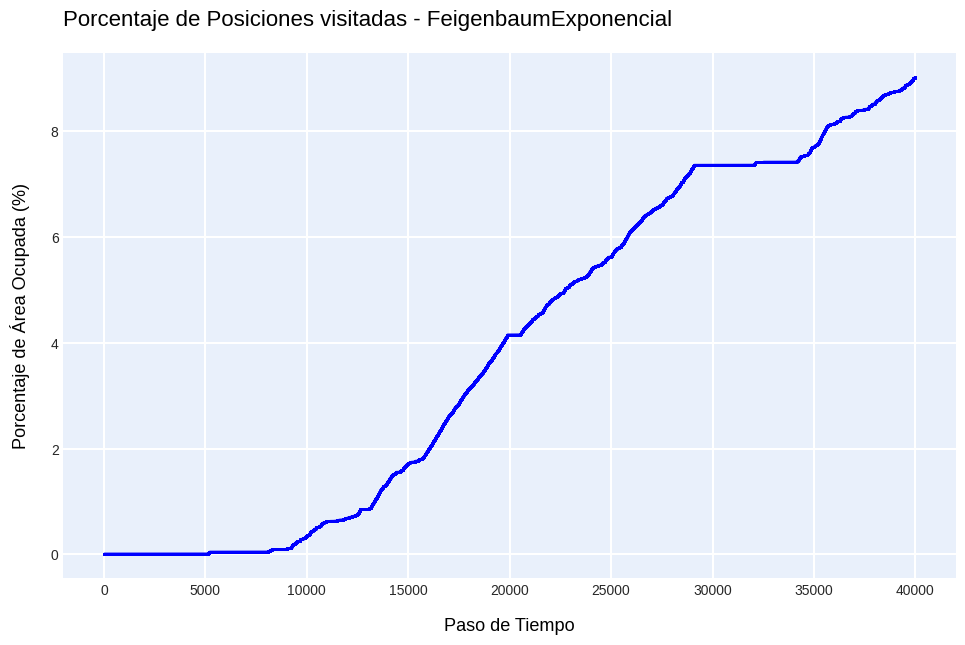

Métrica                                 Valor
0                      Media              (33.164, 25.167, 27.957)
1                    Mediana                    (44.0, 24.0, 29.0)
2                       Moda  ([49, 49, 29], [14608, 10551, 9427])
3           Media Geométrica                       (0.0, 0.0, 0.0)
4                      Rango                          (49, 49, 49)
5        Desviación Estándar               (19.52, 21.569, 16.843)
6                   Varianza           (381.046, 465.225, 283.703)
7                  Asimetría                   (-0.808, 0.0, -0.4)
8   Coeficiente de Variación                 (0.589, 0.857, 0.602)
9                   Curtosis              (-1.097, -1.861, -1.053)
10                  Entropía                 (2.684, 2.836, 2.953)

In [222]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
graficar_posicionesOcupadas(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")
ex = DistribucionProbabilidadVector(np.array(walker_feig))
res = ex.calcular_metricas()
res

## Caminante de Feigenbaum Cúbico

![cubico](datos/FeigenbaumCubica/FeigenbaumCubica2.png)


### Direccion

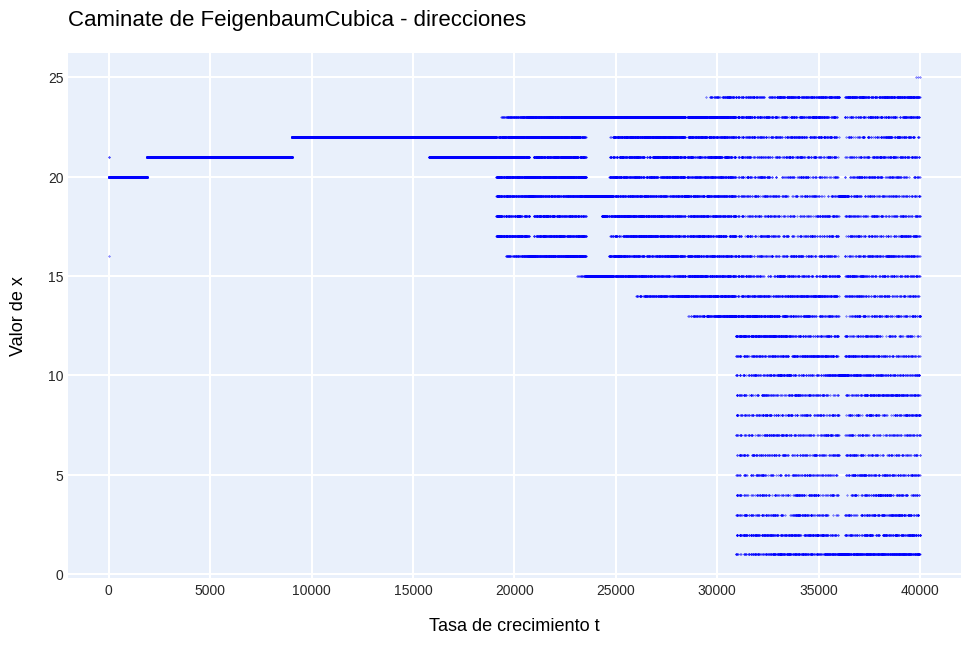

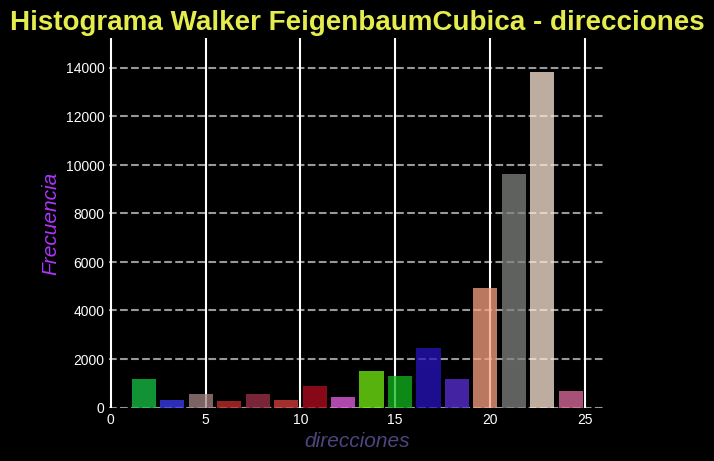

Métrica        Valor
0                      Media       18.791
1                    Mediana         21.0
2                       Moda  (22, 11134)
3           Media Geométrica       17.129
4                      Rango           24
5        Desviación Estándar        5.212
6                   Varianza        27.16
7                  Asimetría       -1.944
8   Coeficiente de Variación        0.277
9                   Curtosis        3.133
10                  Entropía        2.384
11              Percentil 25         18.0
12              Percentil 50         21.0
13              Percentil 75         22.0
14                 Cuartil 1         18.0
15                 Cuartil 2         21.0
16                 Cuartil 3         22.0

In [223]:
modelo = "feigenbaumcubica"
metrica = "direcciones"
folder = "FeigenbaumCubica"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Distancia

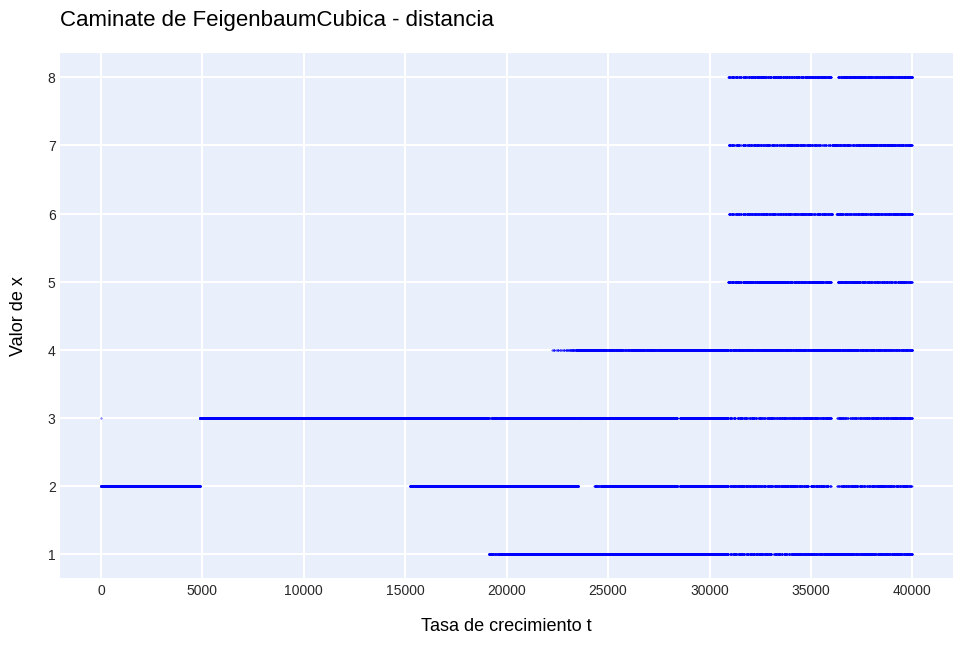

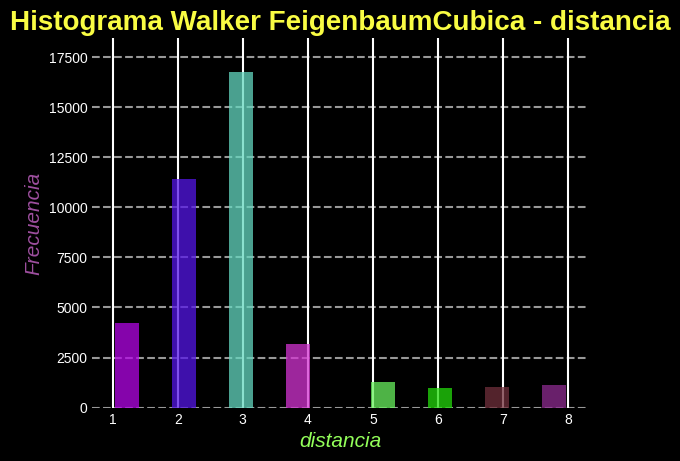

Métrica       Valor
0                      Media       2.965
1                    Mediana         3.0
2                       Moda  (3, 16780)
3           Media Geométrica       2.646
4                      Rango           7
5        Desviación Estándar       1.498
6                   Varianza       2.245
7                  Asimetría       1.565
8   Coeficiente de Variación       0.505
9                   Curtosis       2.838
10                  Entropía       1.556
11              Percentil 25         2.0
12              Percentil 50         3.0
13              Percentil 75         3.0
14                 Cuartil 1         2.0
15                 Cuartil 2         3.0
16                 Cuartil 3         3.0

In [224]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Choques

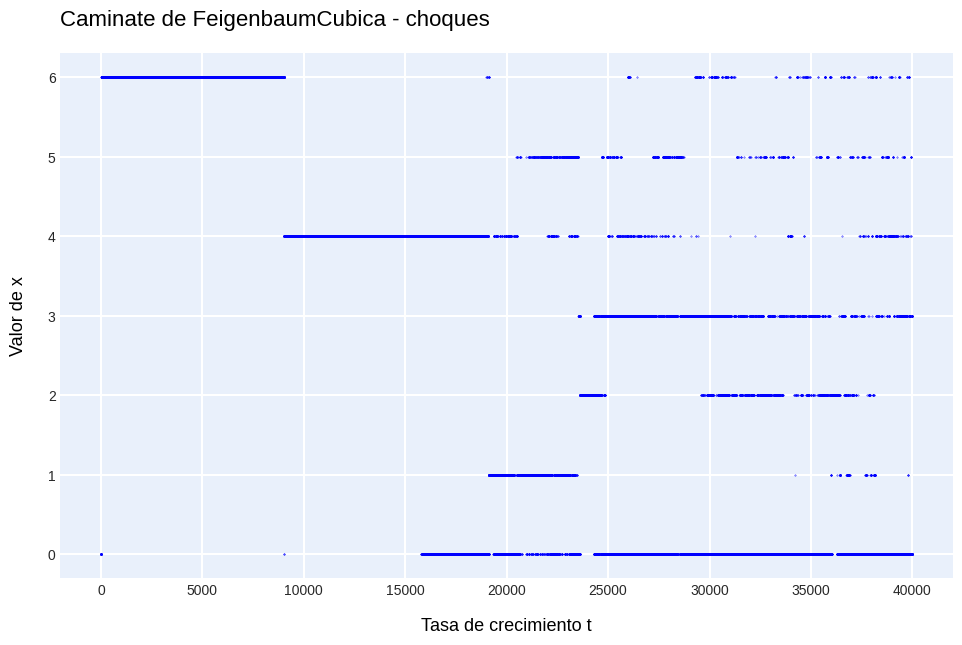

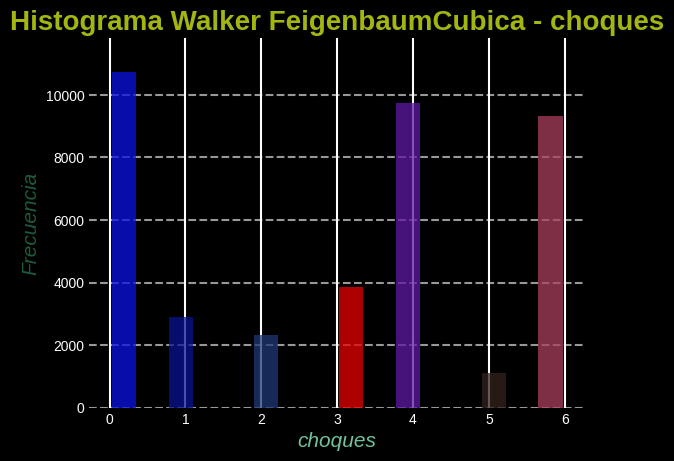

Métrica       Valor
0                      Media       2.991
1                    Mediana         4.0
2                       Moda  (0, 10747)
3           Media Geométrica         0.0
4                      Rango           6
5        Desviación Estándar       2.285
6                   Varianza        5.22
7                  Asimetría      -0.082
8   Coeficiente de Variación       0.764
9                   Curtosis      -1.439
10                  Entropía       1.717
11              Percentil 25         0.0
12              Percentil 50         4.0
13              Percentil 75         5.0
14                 Cuartil 1         0.0
15                 Cuartil 2         4.0
16                 Cuartil 3         5.0

In [225]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Posiciones

[(42, 48, 5), (44, 46, 7), (46, 44, 9), (44, 42, 11), (42, 40, 13), (40, 38, 15), (38, 36, 17), (36, 34, 19), (34, 32, 21), (32, 30, 23), (30, 28, 25), (28, 26, 27), (26, 24, 29), (24, 22, 31), (22, 20, 33), (20, 18, 35), (18, 16, 37), (16, 14, 39), (14, 12, 41), (12, 10, 43), (10, 8, 45), (8, 6, 47), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (

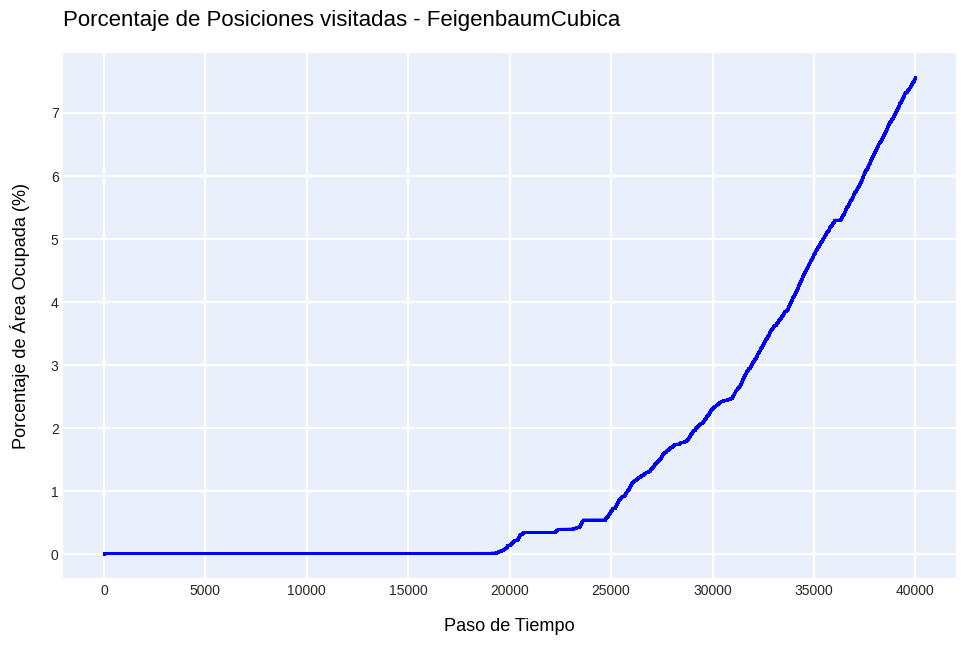

Métrica                               Valor
0                      Media            (12.535, 20.445, 31.584)
1                    Mediana                   (6.0, 10.0, 43.0)
2                       Moda  ([0, 4, 49], [12610, 9435, 10182])
3           Media Geométrica                     (0.0, 0.0, 0.0)
4                      Rango                        (49, 49, 49)
5        Desviación Estándar            (17.186, 19.149, 18.739)
6                   Varianza         (295.373, 366.701, 351.154)
7                  Asimetría              (1.266, 0.548, -0.687)
8   Coeficiente de Variación               (1.371, 0.937, 0.593)
9                   Curtosis            (-0.068, -1.495, -1.235)
10                  Entropía               (2.569, 2.561, 2.819)

In [226]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
graficar_posicionesOcupadas(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")
ex = DistribucionProbabilidadVector(np.array(walker_feig))
res = ex.calcular_metricas()
res

## Caminante de Feigenbaum Triangular

![triangular](datos/FeigenbaumTriangular/FeigenbaumTriangular2.png)


### Dirección

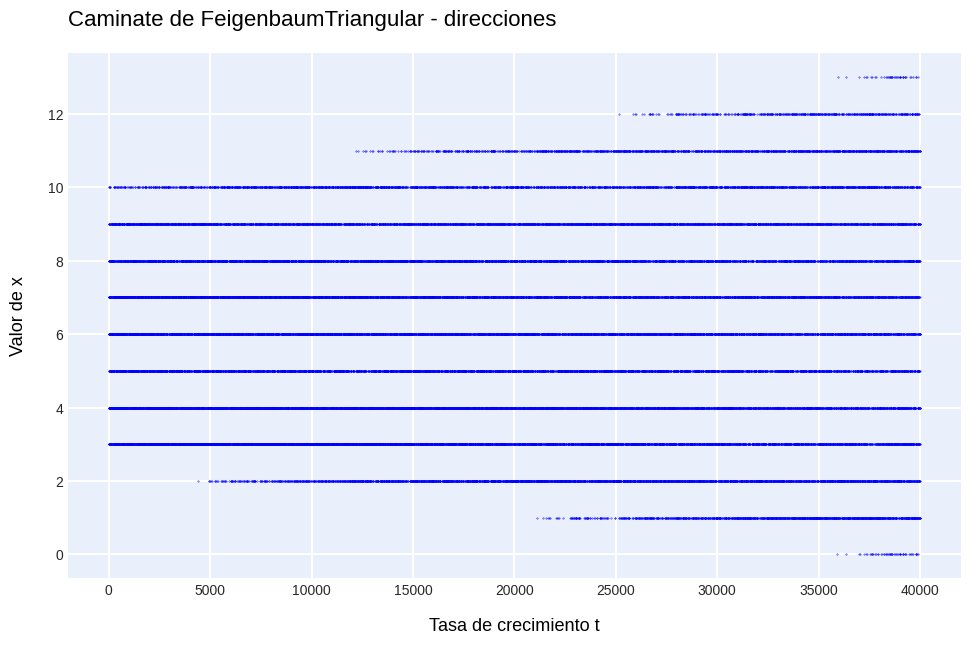

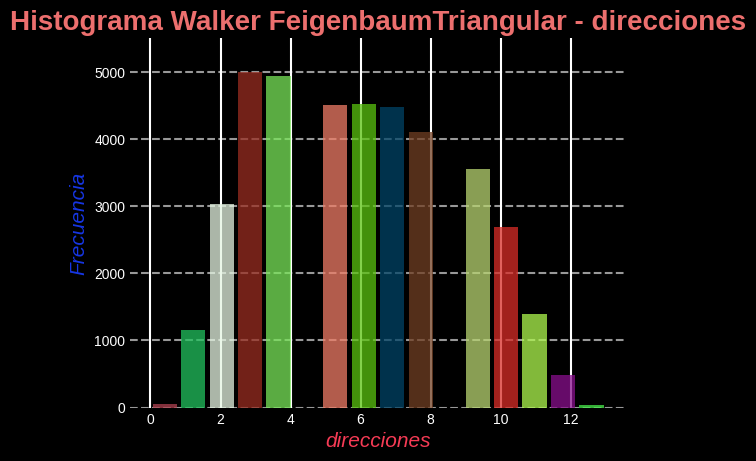

Métrica      Valor
0                      Media      5.918
1                    Mediana        6.0
2                       Moda  (3, 5008)
3           Media Geométrica        0.0
4                      Rango         13
5        Desviación Estándar      2.736
6                   Varianza      7.483
7                  Asimetría      0.177
8   Coeficiente de Variación      0.462
9                   Curtosis     -0.875
10                  Entropía      2.373
11              Percentil 25        4.0
12              Percentil 50        6.0
13              Percentil 75        8.0
14                 Cuartil 1        4.0
15                 Cuartil 2        6.0
16                 Cuartil 3        8.0

In [227]:
modelo = "feigenbaumtriangular"
metrica = "direcciones"
folder = "FeigenbaumTriangular"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Distancia

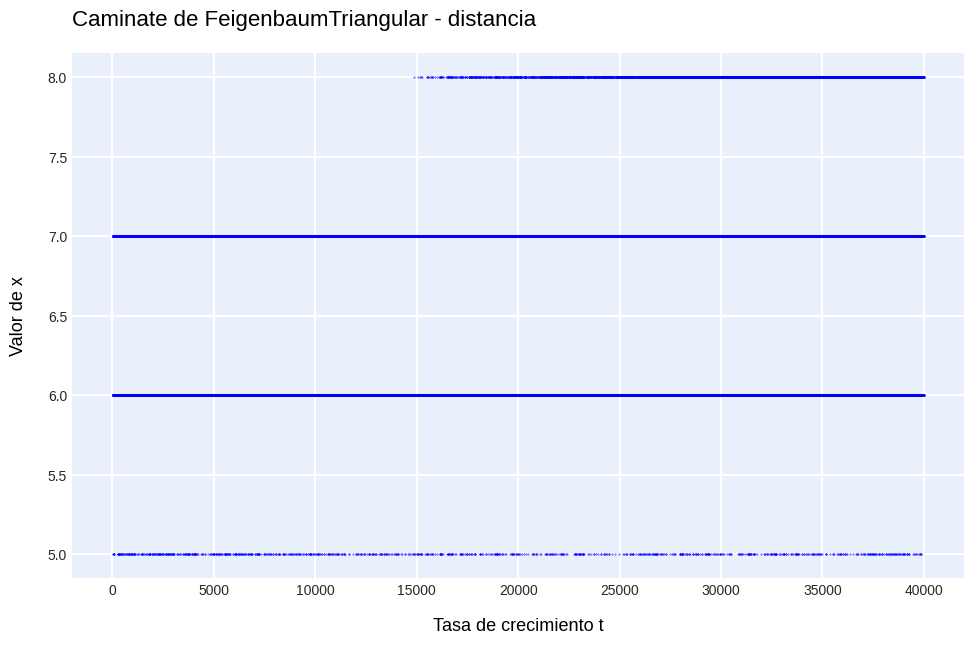

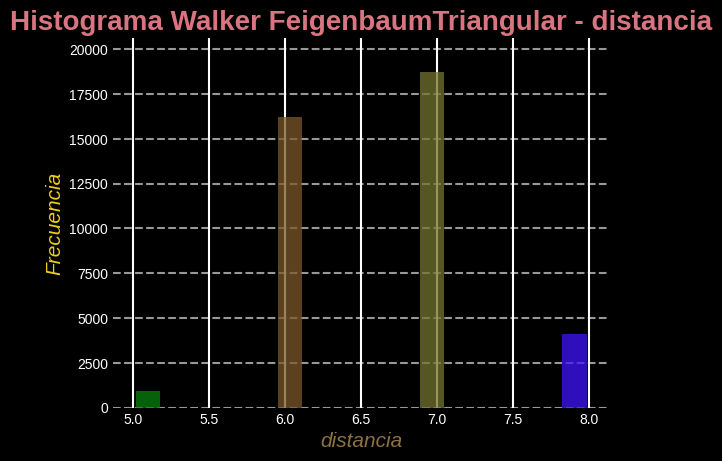

Métrica       Valor
0                      Media        6.65
1                    Mediana         7.0
2                       Moda  (7, 18754)
3           Media Geométrica       6.614
4                      Rango           3
5        Desviación Estándar       0.692
6                   Varianza       0.478
7                  Asimetría       0.169
8   Coeficiente de Variación       0.104
9                   Curtosis      -0.418
10                  Entropía       1.042
11              Percentil 25         6.0
12              Percentil 50         7.0
13              Percentil 75         7.0
14                 Cuartil 1         6.0
15                 Cuartil 2         7.0
16                 Cuartil 3         7.0

In [228]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Choques

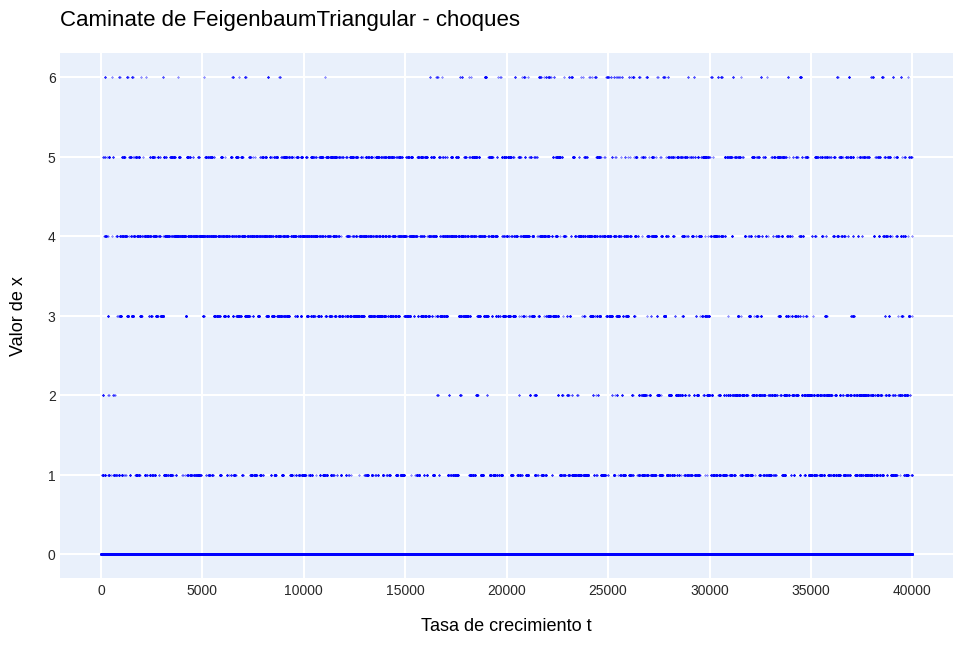

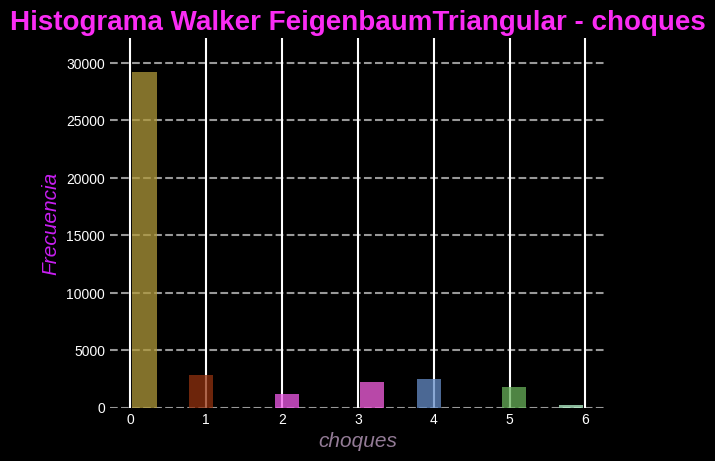

Métrica       Valor
0                      Media       0.805
1                    Mediana         0.0
2                       Moda  (0, 29257)
3           Media Geométrica         0.0
4                      Rango           6
5        Desviación Estándar       1.539
6                   Varianza       2.367
7                  Asimetría       1.756
8   Coeficiente de Variación       1.911
9                   Curtosis       1.669
10                  Entropía       1.022
11              Percentil 25         0.0
12              Percentil 50         0.0
13              Percentil 75         1.0
14                 Cuartil 1         0.0
15                 Cuartil 2         0.0
16                 Cuartil 3         1.0

In [229]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Posiciones

[(38, 32, 14), (33, 32, 14), (33, 26, 8), (26, 33, 8), (26, 33, 14), (19, 40, 14), (19, 40, 20), (26, 47, 20), (20, 47, 20), (14, 41, 20), (21, 34, 20), (21, 34, 26), (28, 41, 26), (28, 41, 32), (21, 48, 32), (21, 48, 26), (28, 41, 26), (22, 41, 26), (16, 35, 26), (23, 28, 26), (23, 28, 20), (30, 21, 20), (30, 21, 26), (37, 28, 26), (32, 28, 26), (32, 22, 20), (39, 29, 20), (33, 29, 20), (27, 23, 20), (34, 16, 20), (34, 16, 26), (27, 23, 26), (27, 23, 20), (34, 30, 20), (28, 30, 20), (22, 24, 20), (29, 17, 20), (29, 17, 14), (36, 24, 14), (30, 24, 14), (24, 18, 14), (31, 11, 14), (31, 11, 20), (24, 18, 20), (24, 18, 14), (31, 11, 14), (25, 11, 14), (19, 5, 14), (24, 0, 14), (24, 0, 8), (24, 0, 8), (24, 0, 14), (17, 7, 14), (17, 7, 8), (24, 0, 8), (24, 0, 14), (17, 7, 14), (17, 7, 8), (24, 14, 8), (18, 14, 8), (12, 8, 8), (19, 1, 8), (19, 1, 14), (26, 8, 14), (21, 8, 14), (21, 2, 8), (28, 9, 8), (28, 9, 14), (22, 15, 14), (22, 15, 8), (29, 8, 8), (29, 8, 2), (36, 1, 2), (36, 1, 8), (43,

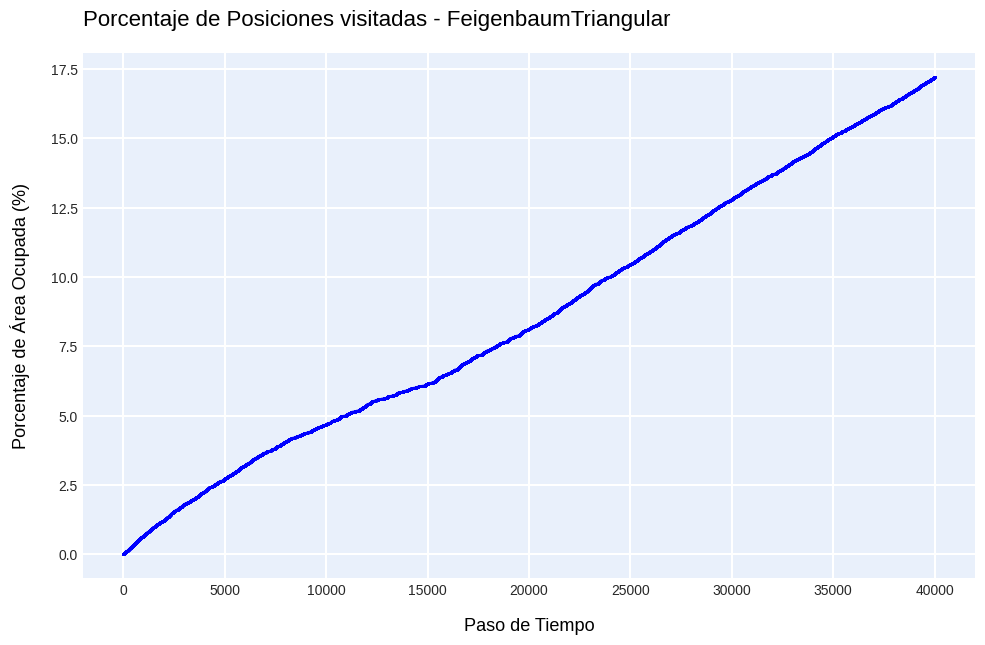

Métrica                            Valor
0                      Media         (16.148, 22.249, 18.584)
1                    Mediana               (11.0, 21.0, 15.0)
2                       Moda  ([0, 0, 0], [7399, 4800, 6025])
3           Media Geométrica                  (0.0, 0.0, 0.0)
4                      Rango                     (49, 49, 49)
5        Desviación Estándar         (15.447, 16.025, 15.039)
6                   Varianza       (238.597, 256.81, 226.167)
7                  Asimetría            (0.777, 0.203, 0.541)
8   Coeficiente de Variación             (0.957, 0.72, 0.809)
9                   Curtosis         (-0.639, -1.229, -0.853)
10                  Entropía             (3.425, 3.645, 3.44)

In [230]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
graficar_posicionesOcupadas(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")
ex = DistribucionProbabilidadVector(np.array(walker_feig))
res = ex.calcular_metricas()
res

## Atractor de Henón

![henon](datos/Henon/Henon2.png)


### Direcciones

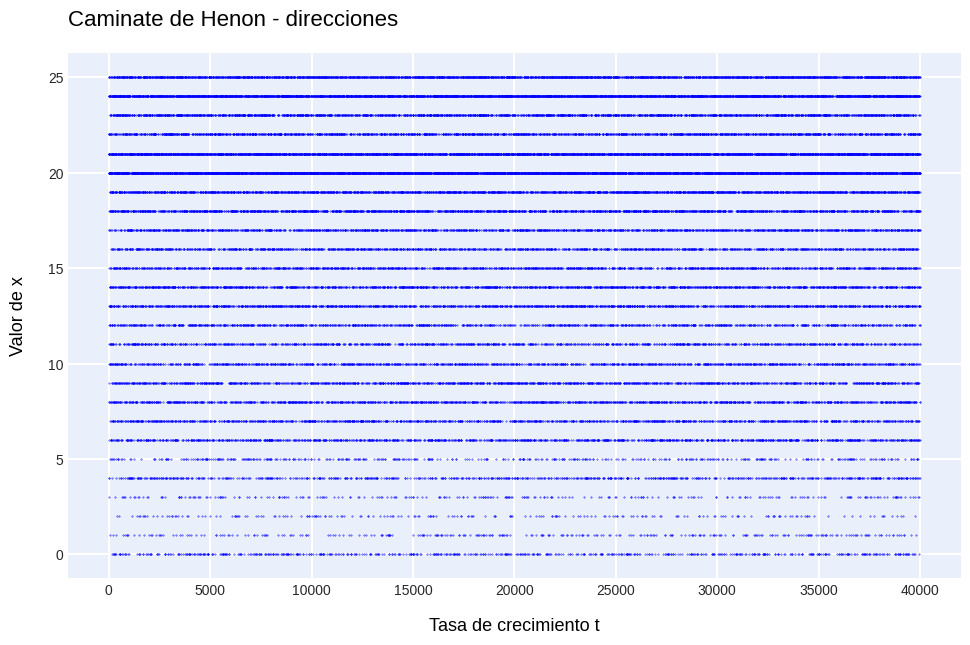

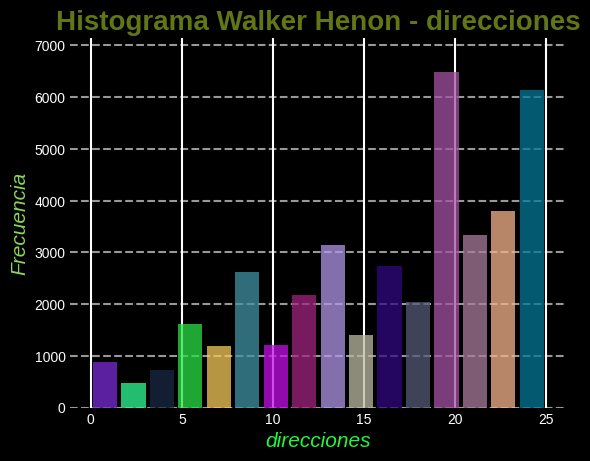

Métrica       Valor
0                      Media      16.507
1                    Mediana        18.0
2                       Moda  (20, 4333)
3           Media Geométrica         0.0
4                      Rango          25
5        Desviación Estándar       6.525
6                   Varianza       42.58
7                  Asimetría      -0.644
8   Coeficiente de Variación       0.395
9                   Curtosis      -0.583
10                  Entropía       3.056
11              Percentil 25        12.0
12              Percentil 50        18.0
13              Percentil 75        21.0
14                 Cuartil 1        12.0
15                 Cuartil 2        18.0
16                 Cuartil 3        21.0

In [231]:
modelo = "transfhenon"
metrica = "direcciones"
folder = "Henon"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Distancias

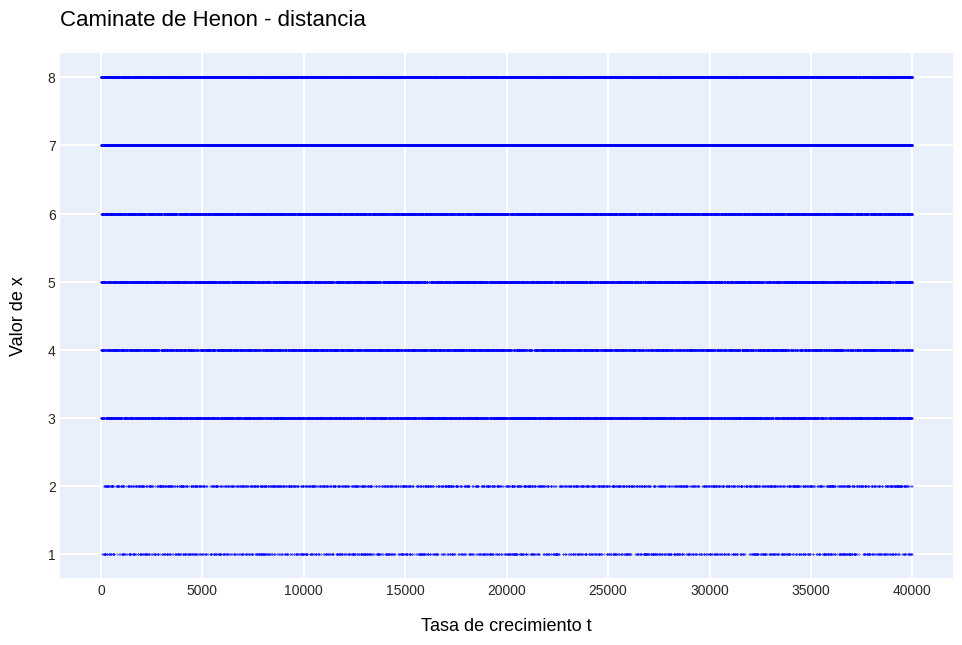

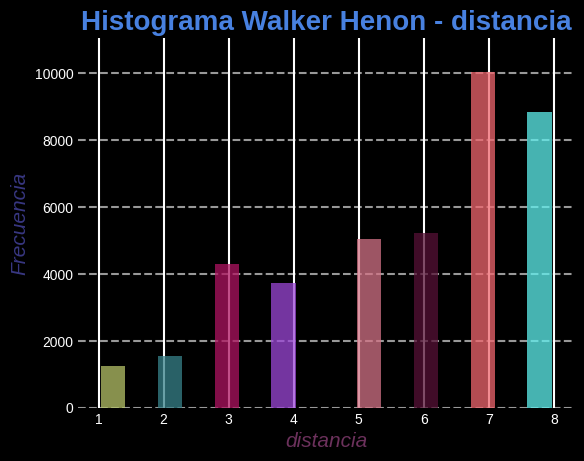

Métrica       Valor
0                      Media       5.747
1                    Mediana         6.0
2                       Moda  (7, 10052)
3           Media Geométrica       5.261
4                      Rango           7
5        Desviación Estándar       1.985
6                   Varianza        3.94
7                  Asimetría      -0.656
8   Coeficiente de Variación       0.345
9                   Curtosis      -0.628
10                  Entropía       1.903
11              Percentil 25         4.0
12              Percentil 50         6.0
13              Percentil 75         7.0
14                 Cuartil 1         4.0
15                 Cuartil 2         6.0
16                 Cuartil 3         7.0

In [232]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Choques

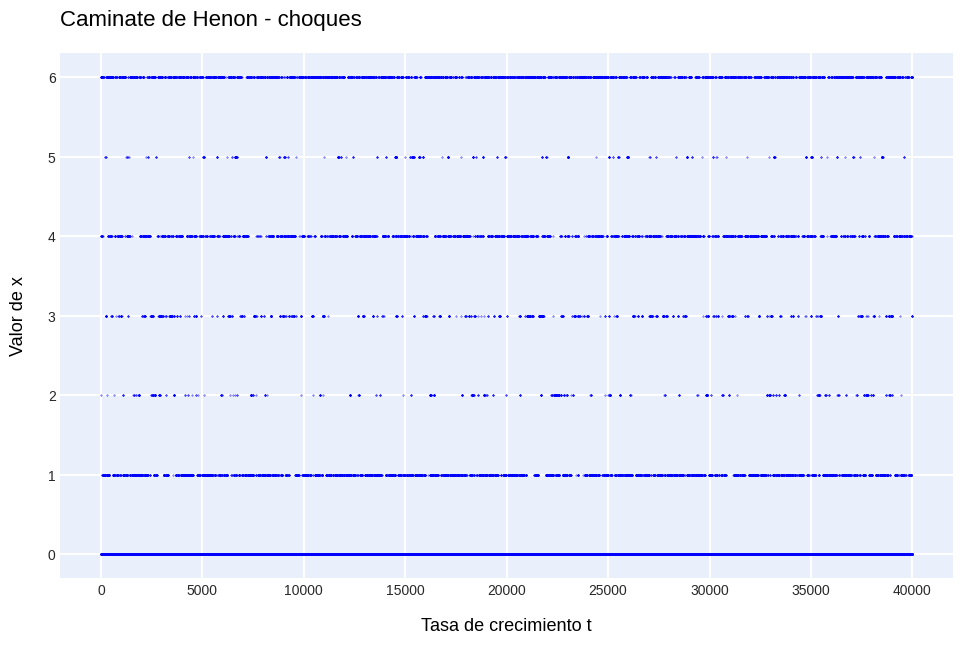

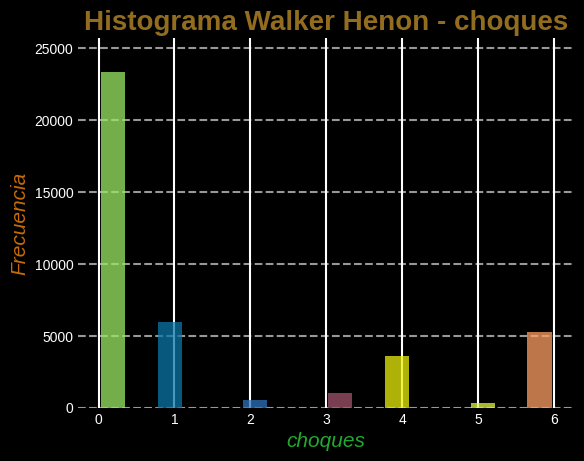

Métrica       Valor
0                      Media        1.44
1                    Mediana         0.0
2                       Moda  (0, 23362)
3           Media Geométrica         0.0
4                      Rango           6
5        Desviación Estándar       2.178
6                   Varianza       4.745
7                  Asimetría       1.233
8   Coeficiente de Variación       1.512
9                   Curtosis      -0.113
10                  Entropía       1.267
11              Percentil 25         0.0
12              Percentil 50         0.0
13              Percentil 75         3.0
14                 Cuartil 1         0.0
15                 Cuartil 2         0.0
16                 Cuartil 3         3.0

In [233]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Posiciones

[(49, 18, 25), (49, 14, 21), (41, 6, 29), (33, 14, 21), (25, 6, 29), (30, 6, 24), (22, 6, 32), (19, 9, 32), (12, 2, 25), (7, 7, 30), (10, 4, 33), (3, 11, 33), (0, 8, 36), (6, 8, 42), (6, 15, 49), (3, 12, 49), (3, 12, 49), (3, 12, 49), (3, 12, 49), (3, 12, 49), (0, 15, 46), (0, 15, 46), (0, 15, 46), (3, 12, 49), (3, 12, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (0, 11, 49), (0, 11, 49), (0, 11, 49), (7, 11, 42), (14, 18, 35), (18, 22, 39), (11, 29, 39), (3, 21, 47), (3, 27, 41), (9, 27, 47), (11, 27, 49), (11, 27, 49), (11, 27, 49), (11, 27, 49), (11, 27, 49), (11, 34, 42), (11, 30, 46), (8, 27, 49), (8, 27, 49), (13, 27, 44), (5, 19, 36), (5, 15, 32), (0, 10, 37), (0, 10, 37), (0, 10, 37), (0, 10, 31), (8, 2, 39), (10, 0, 37), (10, 0, 37), (10, 0, 37), (4, 6, 43), (7, 9, 40), (10, 9, 40), (3, 9, 47), (1, 11, 49), (0, 10, 48), (4, 6, 44), (4, 11, 49), (4, 11, 49), (10, 17, 49), (10, 17, 49), (10, 17, 49), (1

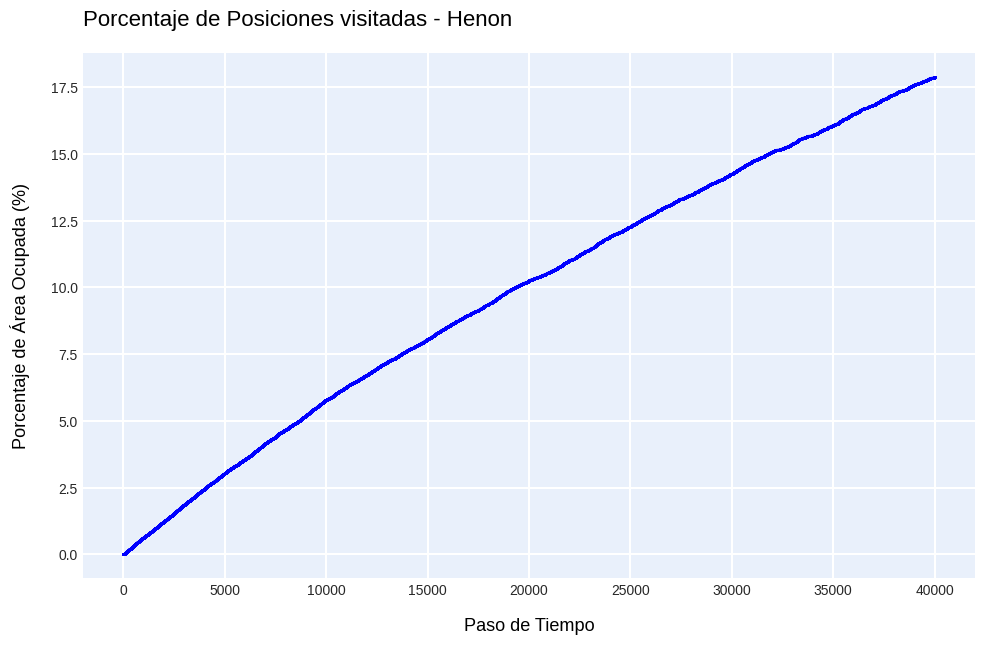

Métrica                             Valor
0                      Media           (15.919, 16.264, 36.05)
1                    Mediana                (13.0, 12.0, 40.0)
2                       Moda  ([0, 0, 49], [5467, 7158, 8941])
3           Media Geométrica                   (0.0, 0.0, 0.0)
4                      Rango                      (49, 49, 49)
5        Desviación Estándar           (13.757, 14.84, 12.815)
6                   Varianza       (189.246, 220.239, 164.216)
7                  Asimetría             (0.71, 0.671, -0.964)
8   Coeficiente de Variación             (0.864, 0.912, 0.355)
9                   Curtosis           (-0.532, -0.721, 0.072)
10                  Entropía             (3.648, 3.582, 3.391)

In [234]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
graficar_posicionesOcupadas(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")
ex = DistribucionProbabilidadVector(np.array(walker_feig))
res = ex.calcular_metricas()
res

## Atractor Rossler

![rossler](datos/Rossler/Rossler2.png)


### Direcciones

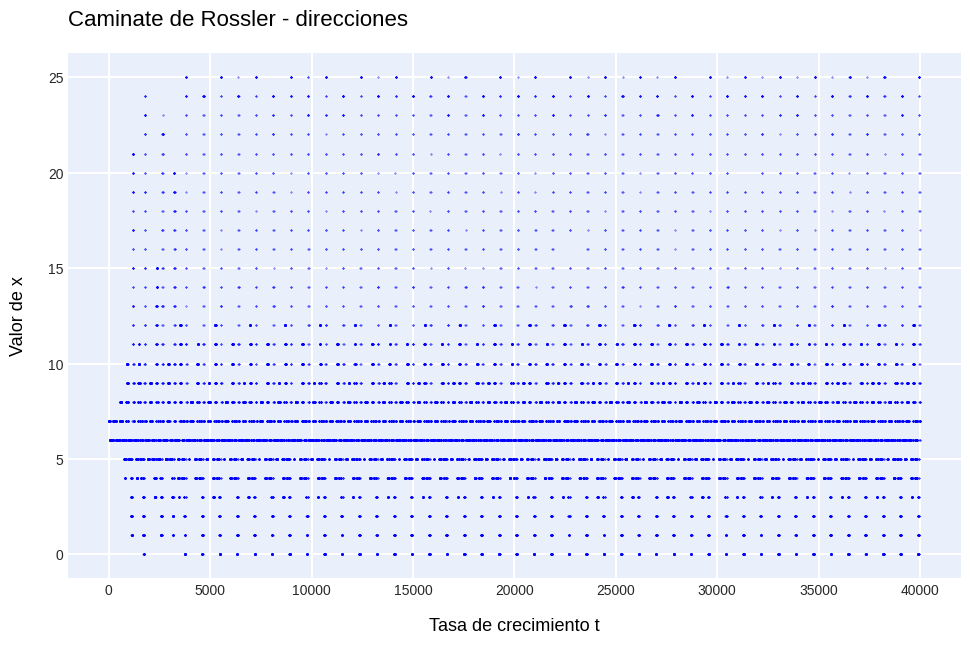

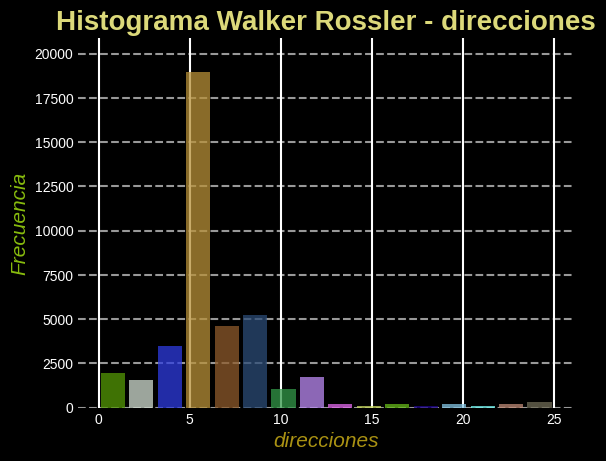

Métrica       Valor
0                      Media       6.525
1                    Mediana         6.0
2                       Moda  (6, 13919)
3           Media Geométrica         0.0
4                      Rango          25
5        Desviación Estándar       3.421
6                   Varianza      11.704
7                  Asimetría       2.231
8   Coeficiente de Variación       0.524
9                   Curtosis       9.151
10                  Entropía       2.237
11              Percentil 25         5.0
12              Percentil 50         6.0
13              Percentil 75         7.0
14                 Cuartil 1         5.0
15                 Cuartil 2         6.0
16                 Cuartil 3         7.0

In [236]:
modelo = "transfrossler"
metrica = "direcciones"
folder = "Rossler"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Distancias

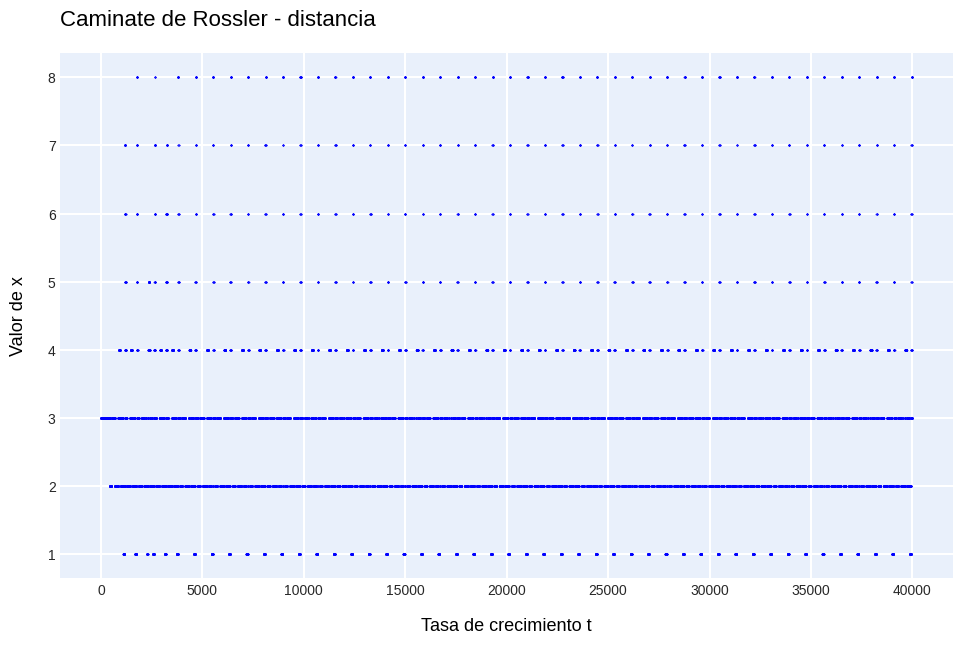

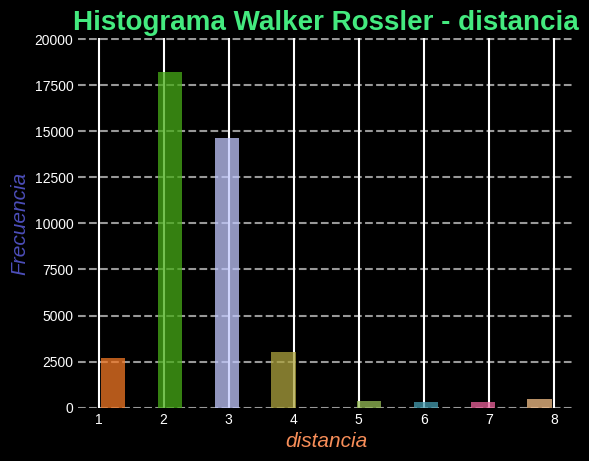

Métrica       Valor
0                      Media       2.615
1                    Mediana         2.0
2                       Moda  (2, 18249)
3           Media Geométrica       2.434
4                      Rango           7
5        Desviación Estándar       1.081
6                   Varianza       1.168
7                  Asimetría       2.152
8   Coeficiente de Variación       0.413
9                   Curtosis       7.807
10                  Entropía        1.27
11              Percentil 25         2.0
12              Percentil 50         2.0
13              Percentil 75         3.0
14                 Cuartil 1         2.0
15                 Cuartil 2         2.0
16                 Cuartil 3         3.0

In [237]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Choques

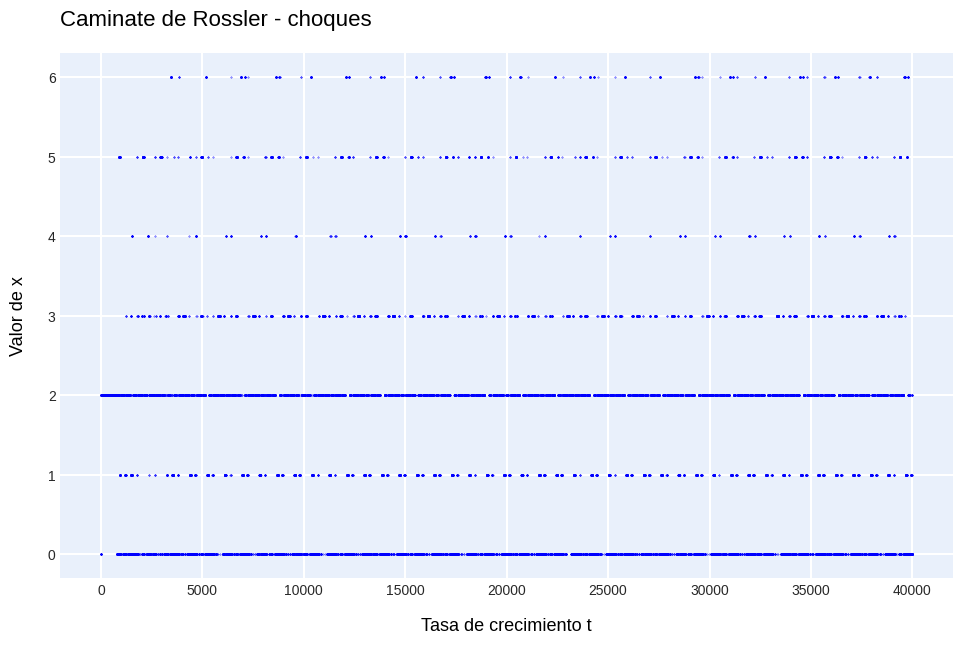

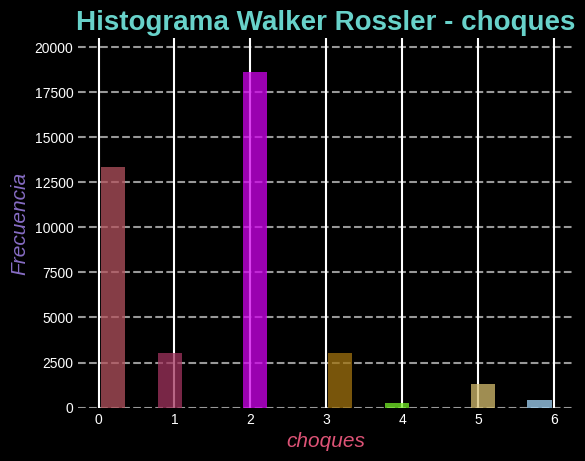

Métrica       Valor
0                      Media       1.485
1                    Mediana         2.0
2                       Moda  (2, 18638)
3           Media Geométrica         0.0
4                      Rango           6
5        Desviación Estándar       1.307
6                   Varianza       1.709
7                  Asimetría       0.765
8   Coeficiente de Variación        0.88
9                   Curtosis       0.987
10                  Entropía       1.303
11              Percentil 25         0.0
12              Percentil 50         2.0
13              Percentil 75         2.0
14                 Cuartil 1         0.0
15                 Cuartil 2         2.0
16                 Cuartil 3         2.0

In [238]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Posiciones


[(25, 25, 19), (28, 28, 19), (31, 31, 19), (34, 34, 19), (37, 37, 19), (40, 40, 19), (43, 43, 19), (46, 46, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 

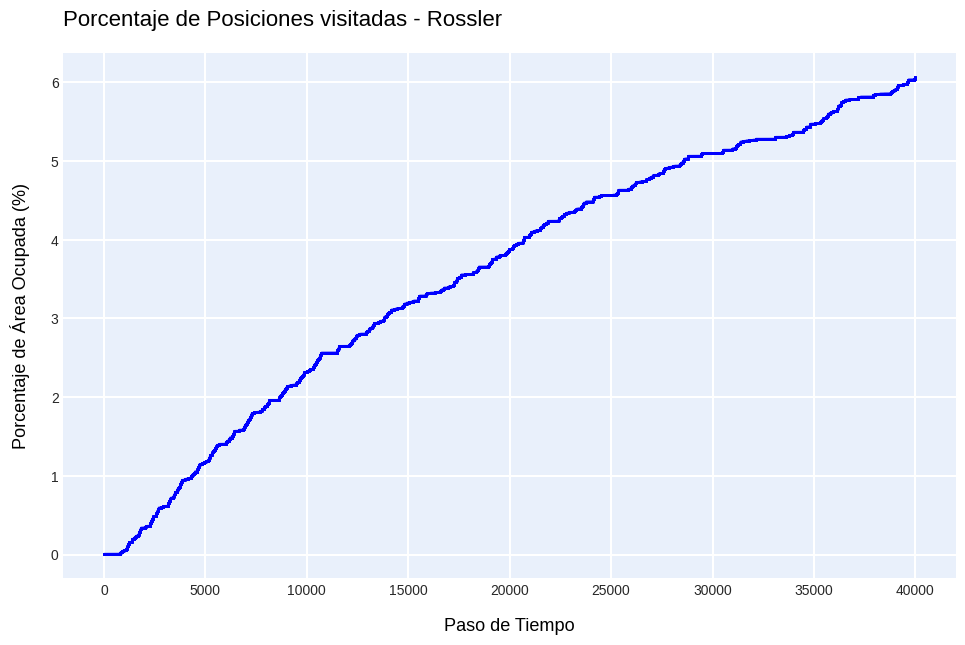

Métrica                                Valor
0                      Media             (39.776, 27.206, 14.845)
1                    Mediana                   (49.0, 28.0, 13.0)
2                       Moda  ([49, 49, 0], [23232, 3995, 11614])
3           Media Geométrica                      (0.0, 0.0, 0.0)
4                      Rango                         (49, 49, 49)
5        Desviación Estándar             (15.166, 14.486, 14.605)
6                   Varianza          (230.014, 209.857, 213.317)
7                  Asimetría              (-1.509, -0.262, 0.758)
8   Coeficiente de Variación                (0.381, 0.532, 0.984)
9                   Curtosis              (0.838, -0.733, -0.538)
10                  Entropía                (2.205, 3.523, 3.138)

In [239]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
graficar_posicionesOcupadas(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")
ex = DistribucionProbabilidadVector(np.array(walker_feig))
res = ex.calcular_metricas()
res

## Atractor Lorentz

![Ejemplo de imagen](datos/Lorentz/Lorentz2.png)


### Direcciones

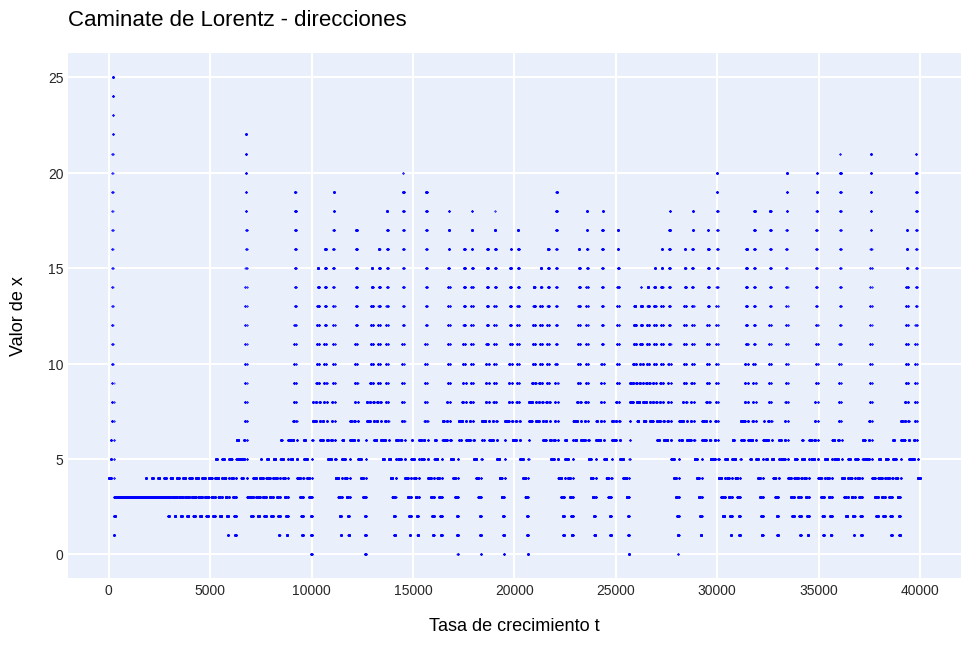

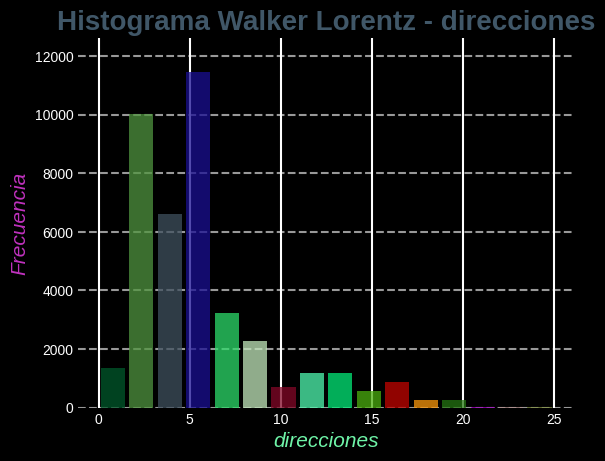

Métrica      Valor
0                      Media      5.737
1                    Mediana        5.0
2                       Moda  (3, 7023)
3           Media Geométrica        0.0
4                      Rango         25
5        Desviación Estándar      3.718
6                   Varianza     13.823
7                  Asimetría      1.682
8   Coeficiente de Variación      0.648
9                   Curtosis      2.897
10                  Entropía       2.44
11              Percentil 25        3.0
12              Percentil 50        5.0
13              Percentil 75        7.0
14                 Cuartil 1        3.0
15                 Cuartil 2        5.0
16                 Cuartil 3        7.0

In [240]:
modelo = "transflorentz"
metrica = "direcciones"
folder = "Lorentz"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Distancias

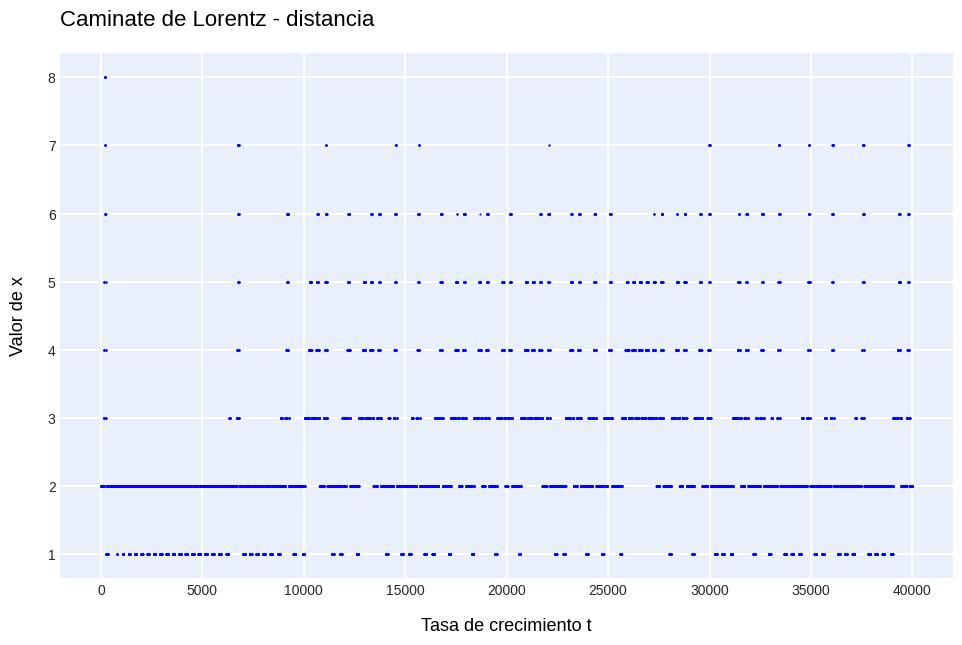

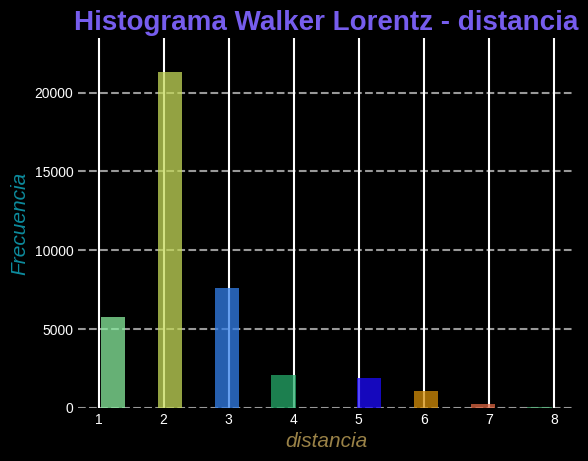

Métrica       Valor
0                      Media       2.431
1                    Mediana         2.0
2                       Moda  (2, 21332)
3           Media Geométrica       2.196
4                      Rango           7
5        Desviación Estándar       1.175
6                   Varianza        1.38
7                  Asimetría        1.52
8   Coeficiente de Variación       0.483
9                   Curtosis       2.547
10                  Entropía       1.359
11              Percentil 25         2.0
12              Percentil 50         2.0
13              Percentil 75         3.0
14                 Cuartil 1         2.0
15                 Cuartil 2         2.0
16                 Cuartil 3         3.0

In [241]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Choques

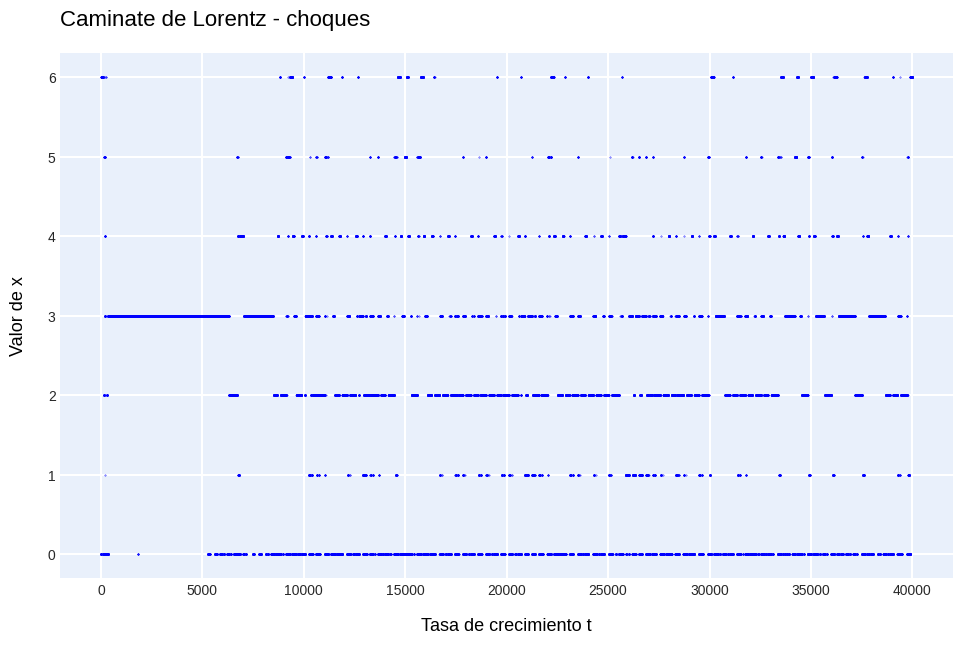

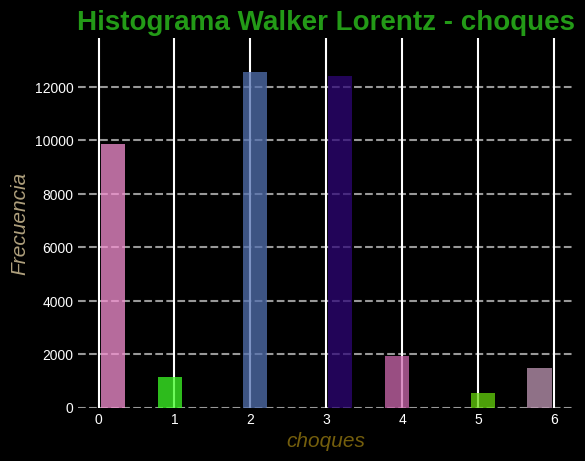

Métrica       Valor
0                      Media       2.077
1                    Mediana         2.0
2                       Moda  (2, 12580)
3           Media Geométrica         0.0
4                      Rango           6
5        Desviación Estándar       1.495
6                   Varianza       2.234
7                  Asimetría       0.283
8   Coeficiente de Variación        0.72
9                   Curtosis       0.079
10                  Entropía       1.502
11              Percentil 25         1.0
12              Percentil 50         2.0
13              Percentil 75         3.0
14                 Cuartil 1         1.0
15                 Cuartil 2         2.0
16                 Cuartil 3         3.0

In [242]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=7, height=5 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")
ex = DistribucionProbabilidad(walker_feig)
res = ex.calcular_metricas([25, 50, 75], [1, 2, 3])
res

### Posiciones

[(47, 24, 8), (47, 24, 10), (47, 24, 12), (47, 24, 14), (47, 24, 16), (47, 24, 18), (47, 24, 20), (47, 24, 22), (47, 24, 24), (47, 24, 26), (47, 24, 28), (47, 24, 30), (47, 24, 32), (47, 24, 34), (47, 24, 36), (47, 24, 38), (47, 24, 40), (47, 24, 42), (47, 24, 44), (47, 24, 46), (47, 24, 48), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 2

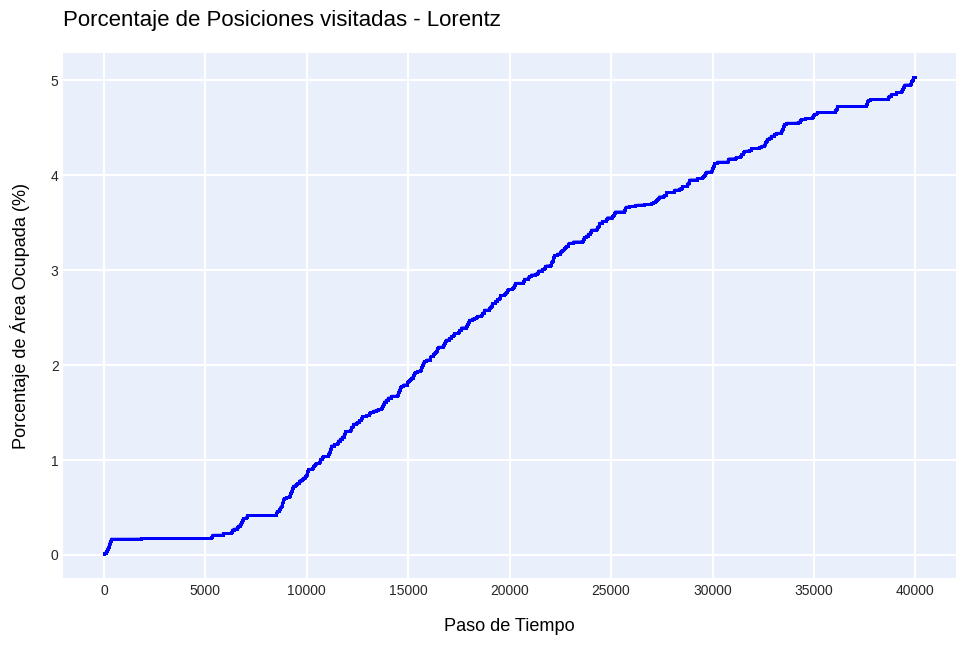

Métrica                                 Valor
0                      Media              (24.814, 32.707, 29.064)
1                    Mediana                    (27.0, 35.0, 32.0)
2                       Moda  ([0, 49, 49], [14650, 15071, 14979])
3           Media Geométrica                       (0.0, 0.0, 0.0)
4                      Rango                          (49, 49, 49)
5        Desviación Estándar              (21.873, 15.764, 19.215)
6                   Varianza           (478.427, 248.493, 369.233)
7                  Asimetría               (-0.046, -0.413, -0.34)
8   Coeficiente de Variación                 (0.881, 0.482, 0.661)
9                   Curtosis               (-1.801, -1.146, -1.44)
10                  Entropía                 (2.148, 2.894, 2.529)

In [243]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
graficar_posicionesOcupadas(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")
ex = DistribucionProbabilidadVector(np.array(walker_feig))
res = ex.calcular_metricas()
res